# Business case
Predict house sales price prediction in The Ames Housing dataset

# Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:-

a) Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      
 b) Determine the relationship between the house features and how the price varies based on this.

Task3:- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")




In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/gdrive/My Drive/capstone project/PRCP-1020-HousePricePred/Data/data.csv')

## 2)Basic checks

In [ ]:
data.shape

(1460, 81)

In [ ]:
data.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
num_data=data.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)

numerical colums Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
cat_data=data.select_dtypes(include=["O"])
print("categorical colums",cat_data.columns)

categorical colums Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
for i in cat_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("**********************")

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**********************
Street ['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64
**********************
Alley [nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64
**********************
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**********************
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**********************
Utilities ['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**********************
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**********************
LandSlope ['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev    

In [ ]:
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [ ]:
data.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [ ]:
nulldata=data.isnull().sum()

In [ ]:
nud=pd.DataFrame(nulldata)
nud

0
Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
...            ...
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0

[81 rows x 1 columns]

 ***Domain Analysis***

 * The target variable is SalePrice
 * in this data we have 81 features including target
 * missing values are present in the dataset
 * Alley,PoolQC,MiscFeature,Fence these features are having morethan 75% of missing data
 * FireplaceQu is also having 690 missing values

## 3)EDA

* Checking the distribution of target column

<Axes: xlabel='SalePrice', ylabel='Count'>

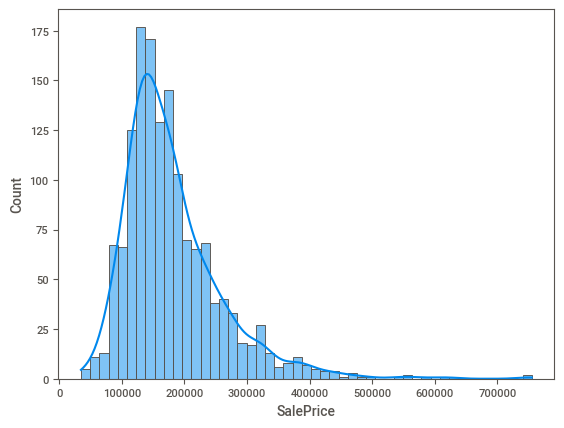

In [ ]:
sns.histplot(data=data['SalePrice'],kde = True)

In [ ]:
print(data['SalePrice'].describe())


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


* Slight skew towards right direction

In [ ]:
corr=data.corr().SalePrice.sort_values(ascending=False) #checking the correlation b/w target and independent numerical columns
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

only 10 numerical features are having moethan .5  correlation value for target variable

In [ ]:
imp_numclm=data[['OverallQual','GrLivArea' ,'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]


* **ANOVA test**

In [ ]:
from scipy import stats

In [ ]:
cat_data.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

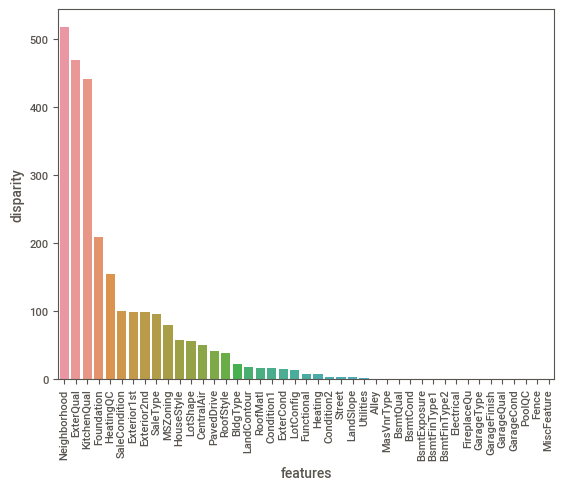

In [ ]:
#hypothesis is as follows:

#Ho - There exists no significant difference between the groups. Ha - There exists a significant difference between the groups.


cat = [f for f in data.columns if data.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['SalePrice'] = data.SalePrice.values
k = anova(cat_data)
k['disparity'] = np.log(1./k['pval'].values)
sns.barplot(data=k, x = 'features', y='disparity')
plt.xticks(rotation=90)
plt

Neighborhood,exterqual,kitchenqual,foundation,heatingqc are the most important categorical feature

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv#importing sweetviz library
my_report = sv.analyze(cat_data)#syntax to use sweetviz
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Insights from univariate analysis for categorical data**

* in mszoning most customers(79%) choose RL zone
* in alley  94% percentage of data is null values

--> Distribution of imp num clmns

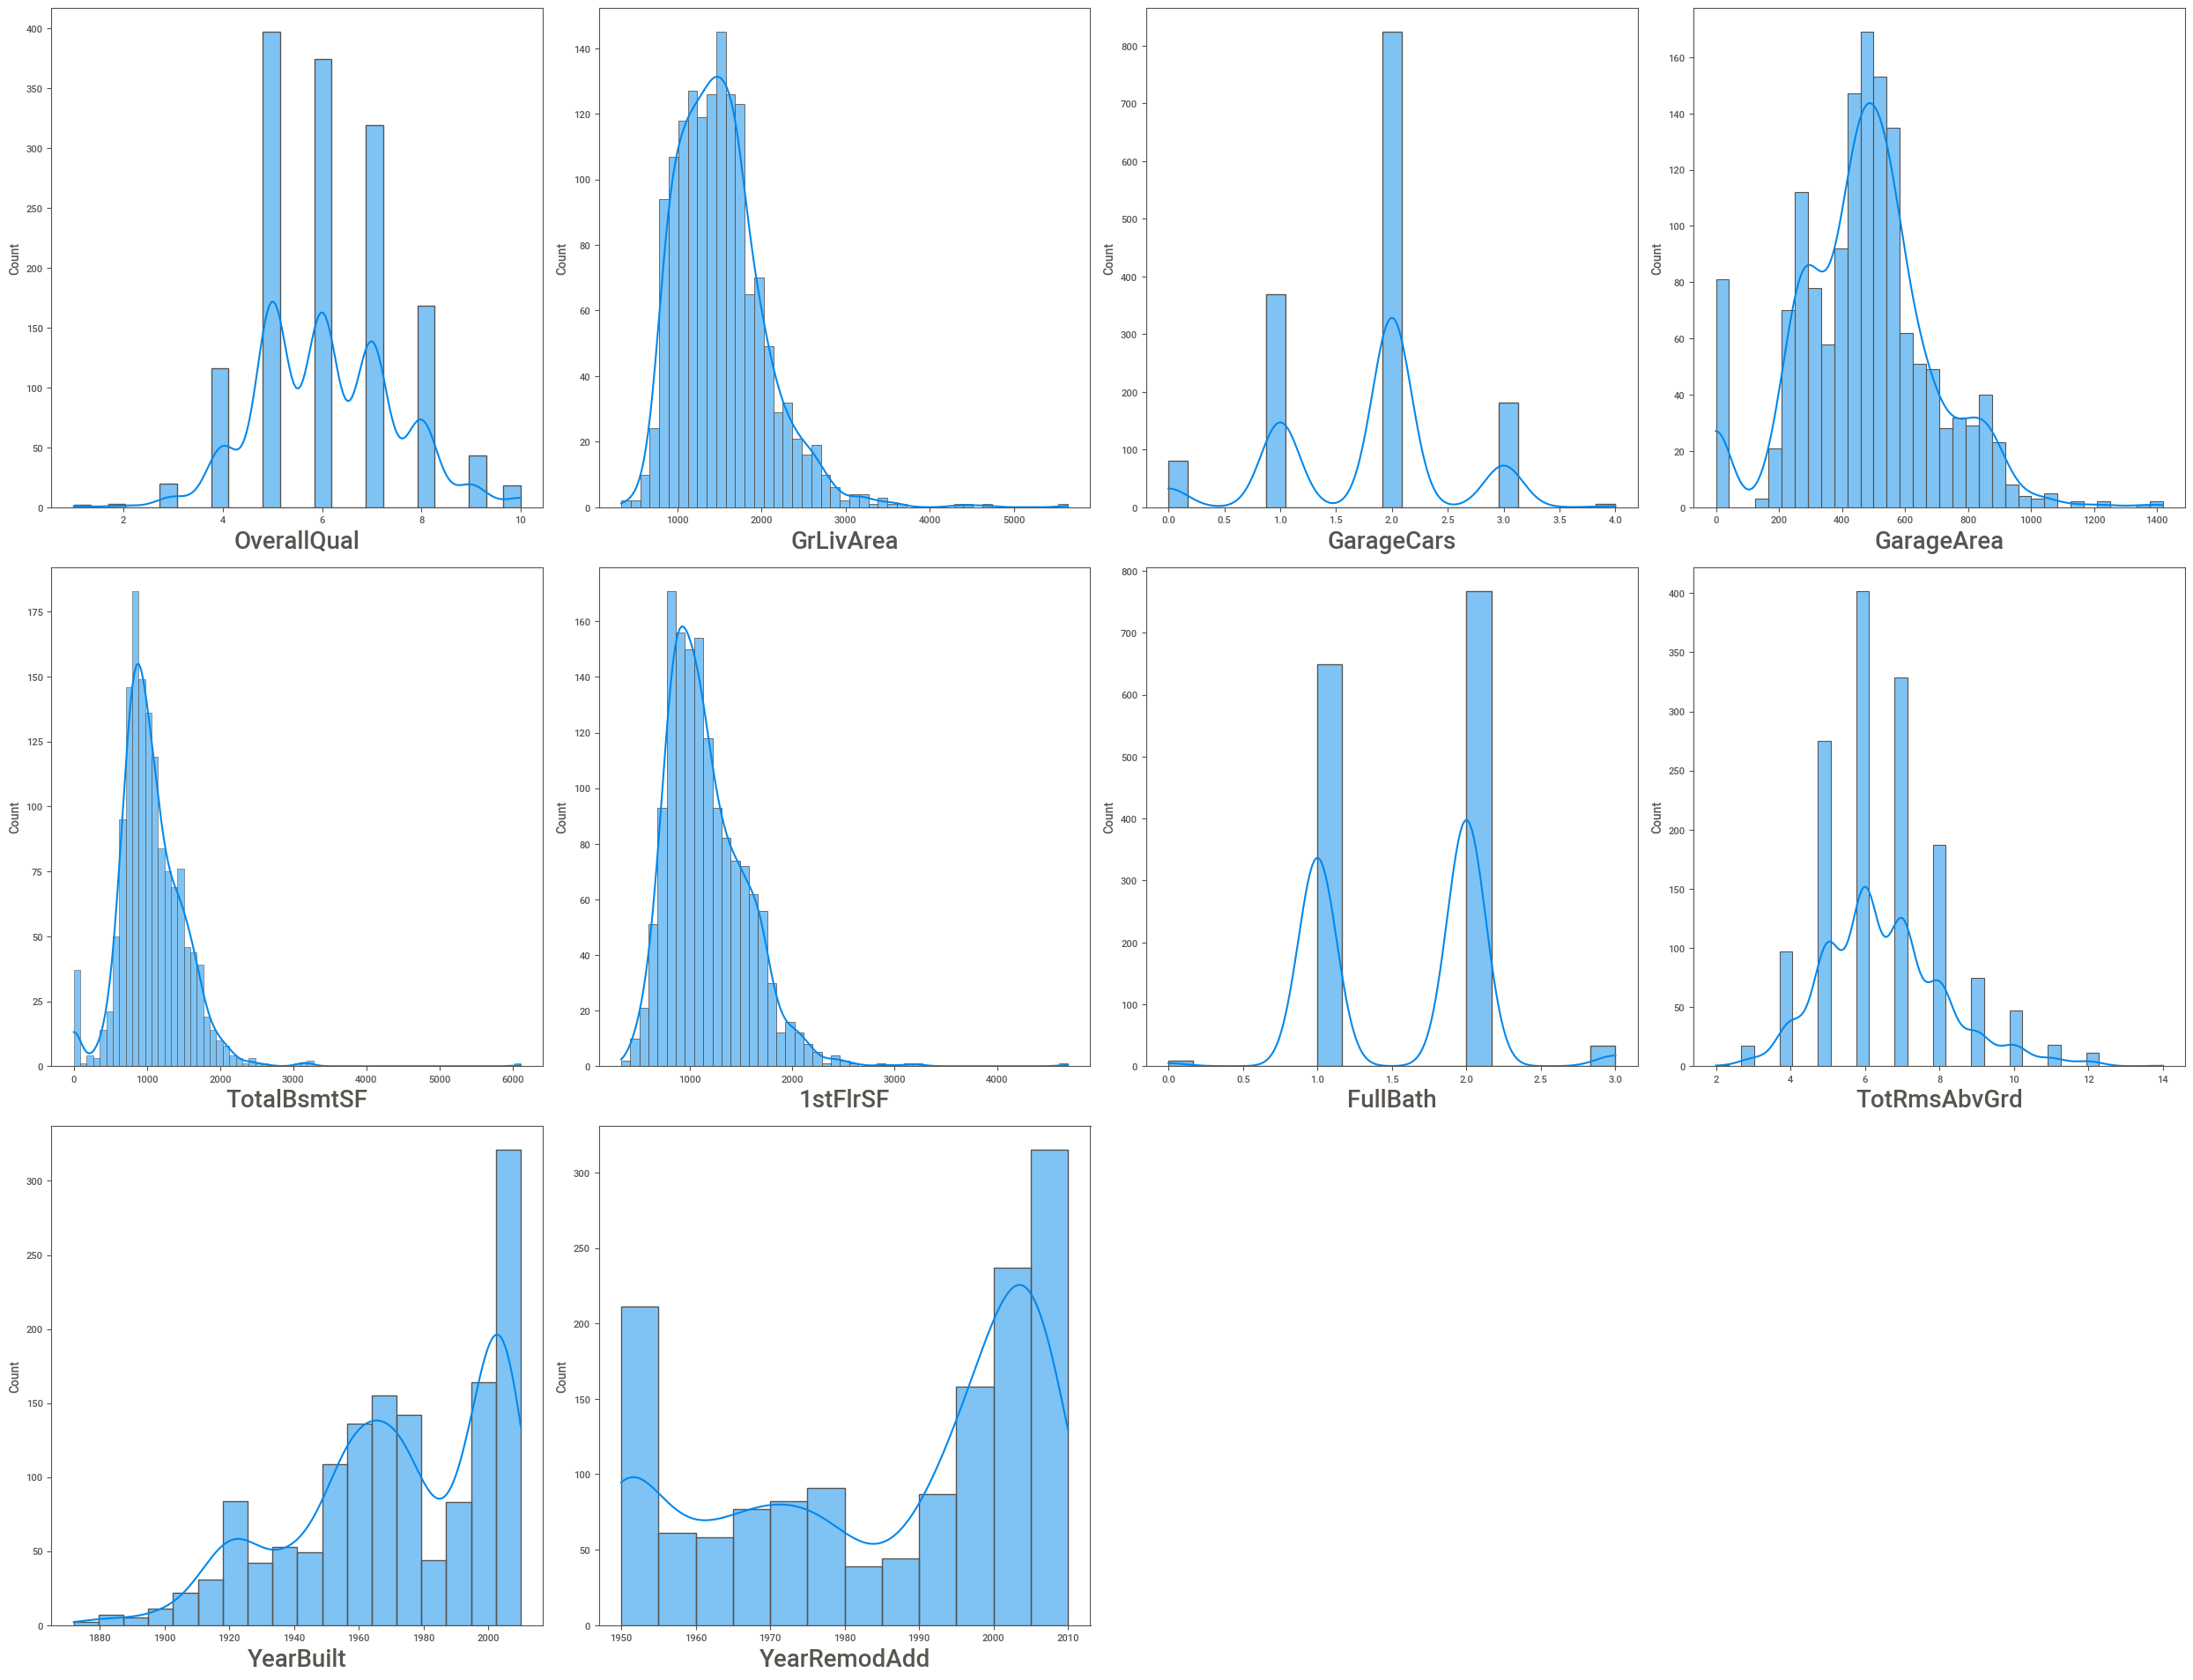

In [ ]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in imp_numclm:
    if(plotnum<16):
        ax=plt.subplot(4,4,plotnum)
        sns.histplot(x=imp_numclm[c],kde=True)
        plt.xlabel(c,fontsize=20)


    plotnum+=1
plt.tight_layout()

most of the features are showing right skewness
most of the houses are built in after 2000

target vs numerical features

target vs binary feature

<Axes: xlabel='CentralAir', ylabel='SalePrice'>

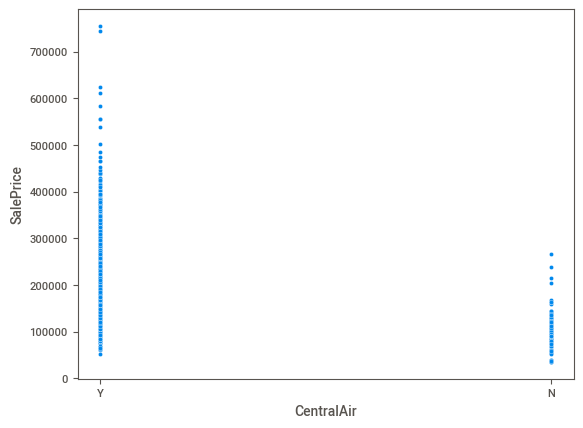

In [ ]:
sns.scatterplot(x=data.CentralAir,y=data.SalePrice)

* price will increases for CentalAir facility

In [ ]:
#target v/s disc_feature

In [ ]:
num_data.shape

(1460, 38)

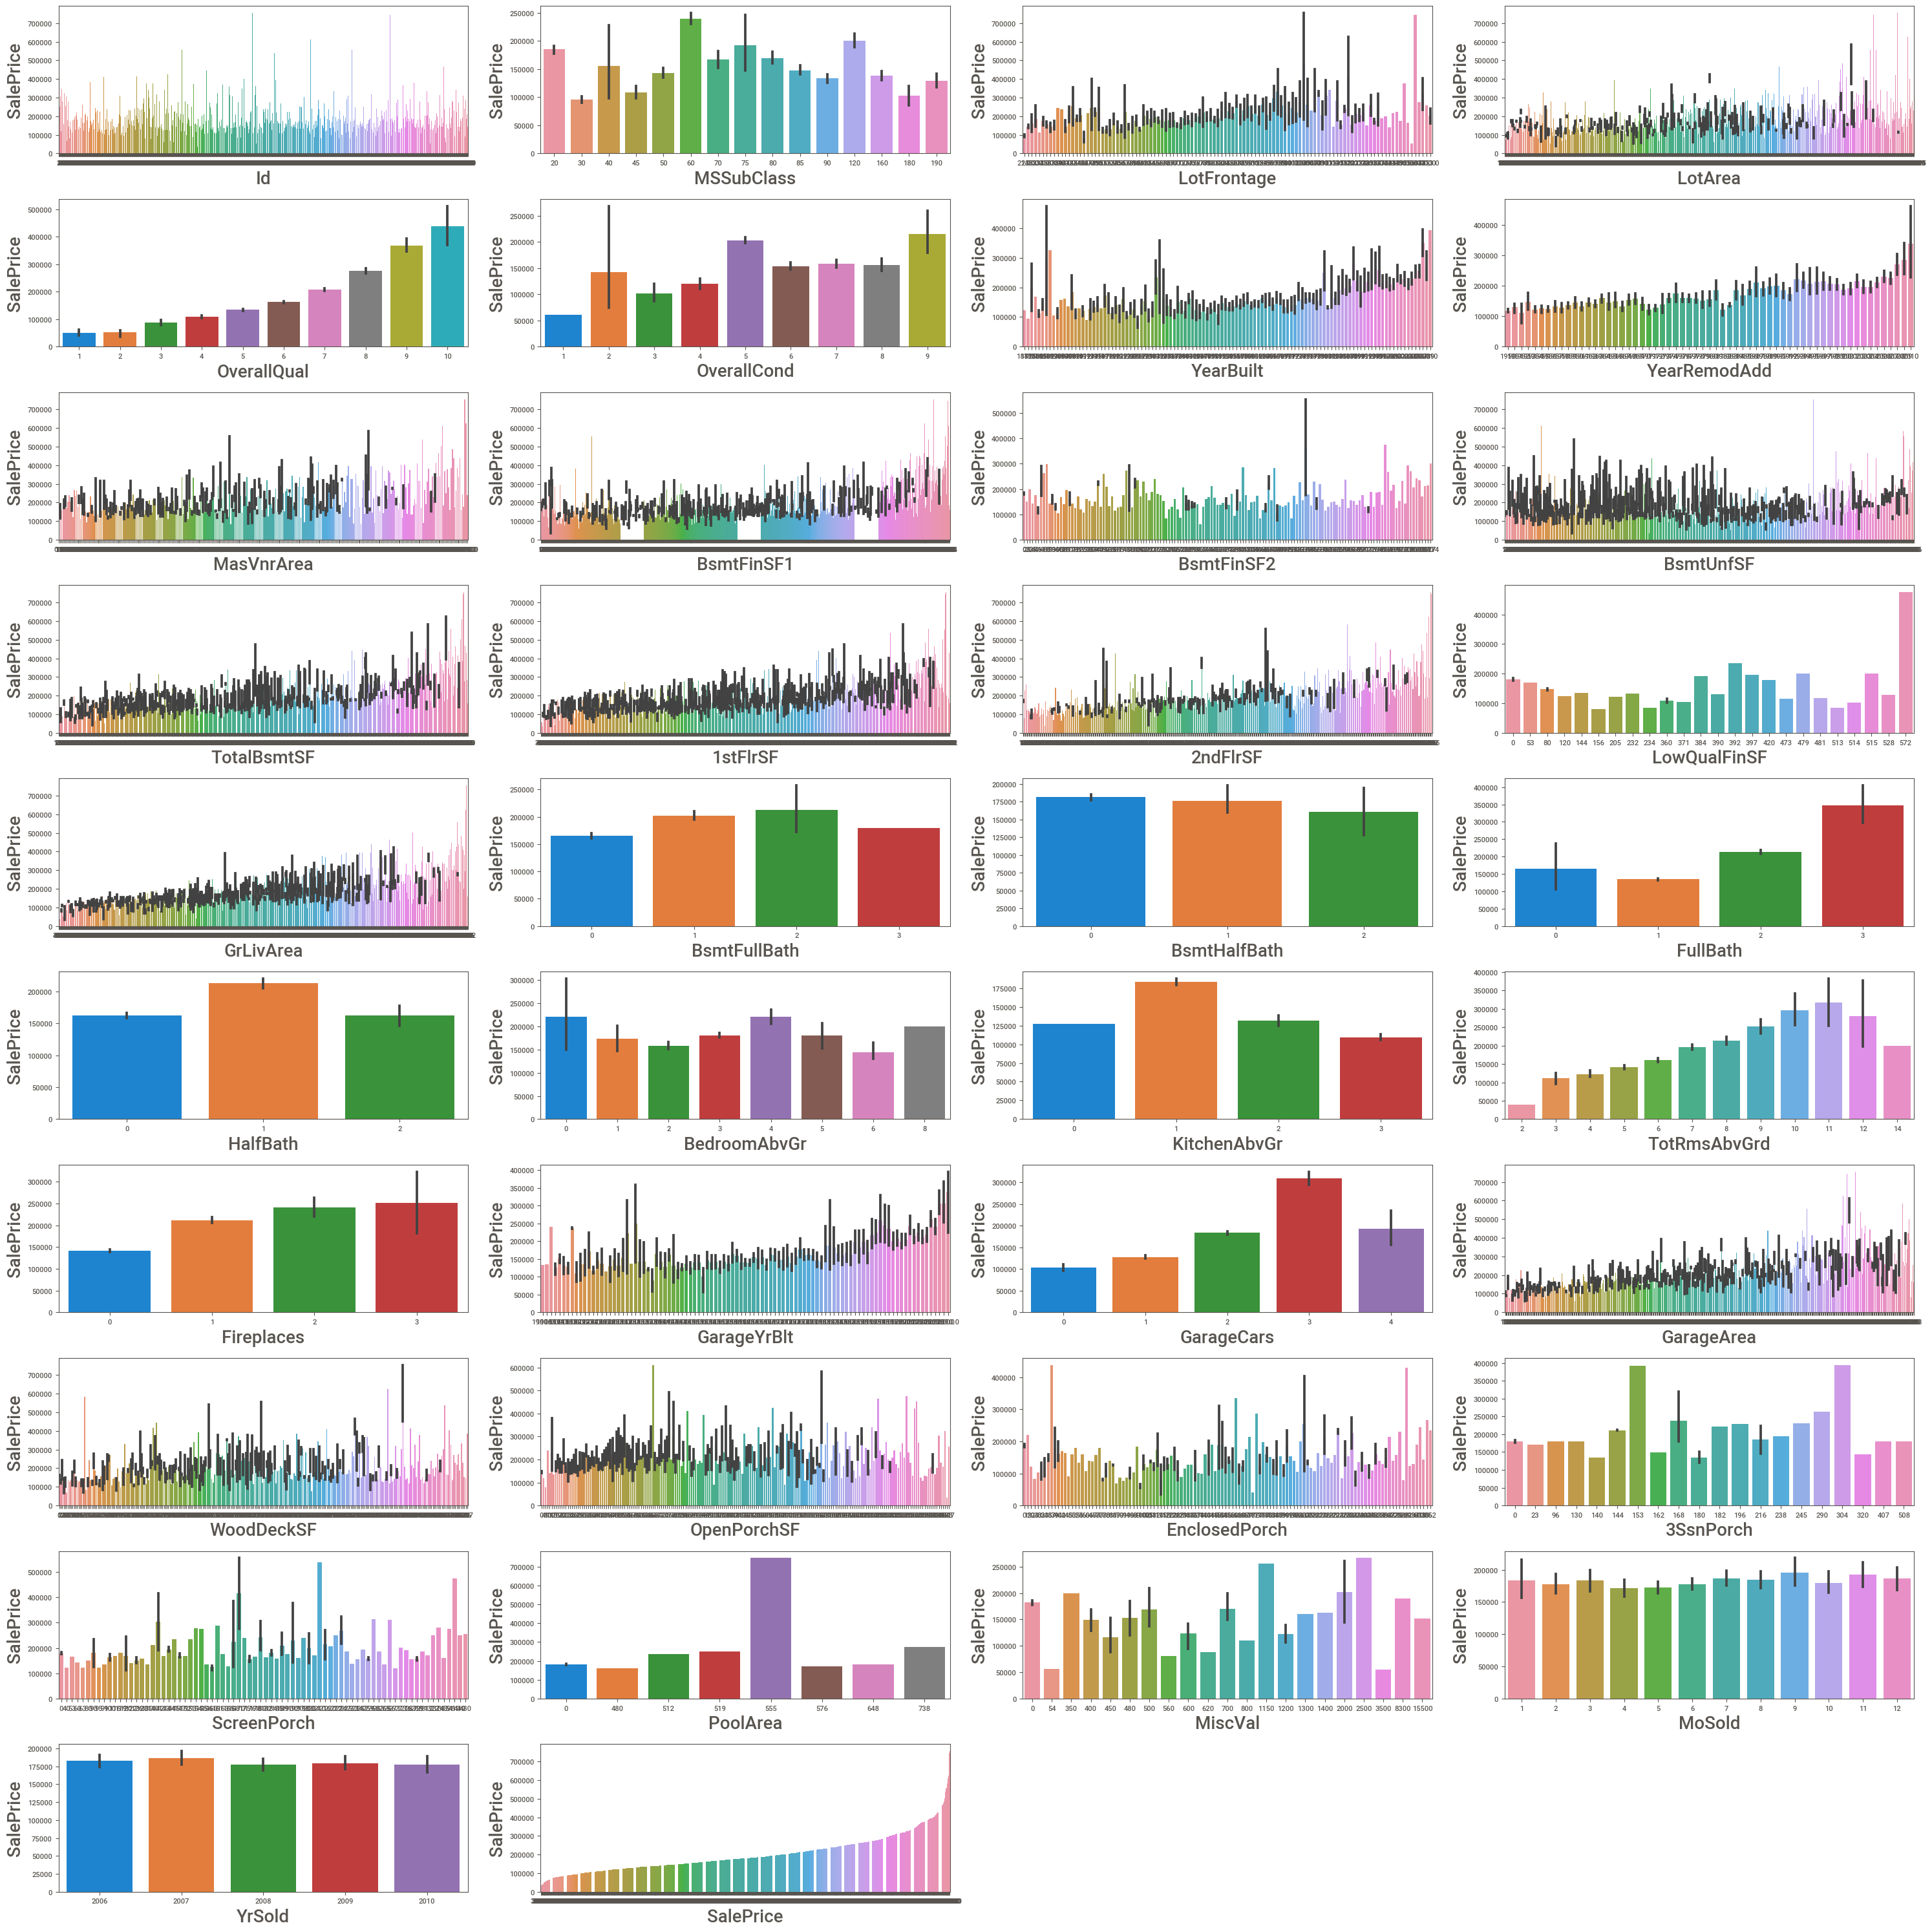

In [ ]:
plt.figure(figsize = (30,30))
a=1
for i in (num_data):
  if(a<=40):
         ax=plt.subplot(10,4,a)
         sns.barplot(x=num_data[i],y=data.SalePrice)
         plt.xlabel(i,fontsize=20)
         plt.ylabel("SalePrice",fontsize=20)
  a+=1
plt.tight_layout()


* The price will increases as per the increase in quality
* The sale price is depend upon the totalrooms above ground & price is increases for 9 to 12 rooms
* Sales price is increases for 3 car paking garage space
*  For 3 full bath facility the sales price will increases
* The sales price is high for 1 kitchen above ground
* The sales price is increases as per the facilities in the house and quality of the facilities
* Here also seeing zero values in independend variables


*  in half bath,bsmtfullbath,fireplace near to 50% data has 0 values
* in bsmthalfbath morethan 70% data is assigned as 0
* garagecars,fullbath also has 0 values



target v/s categoricl

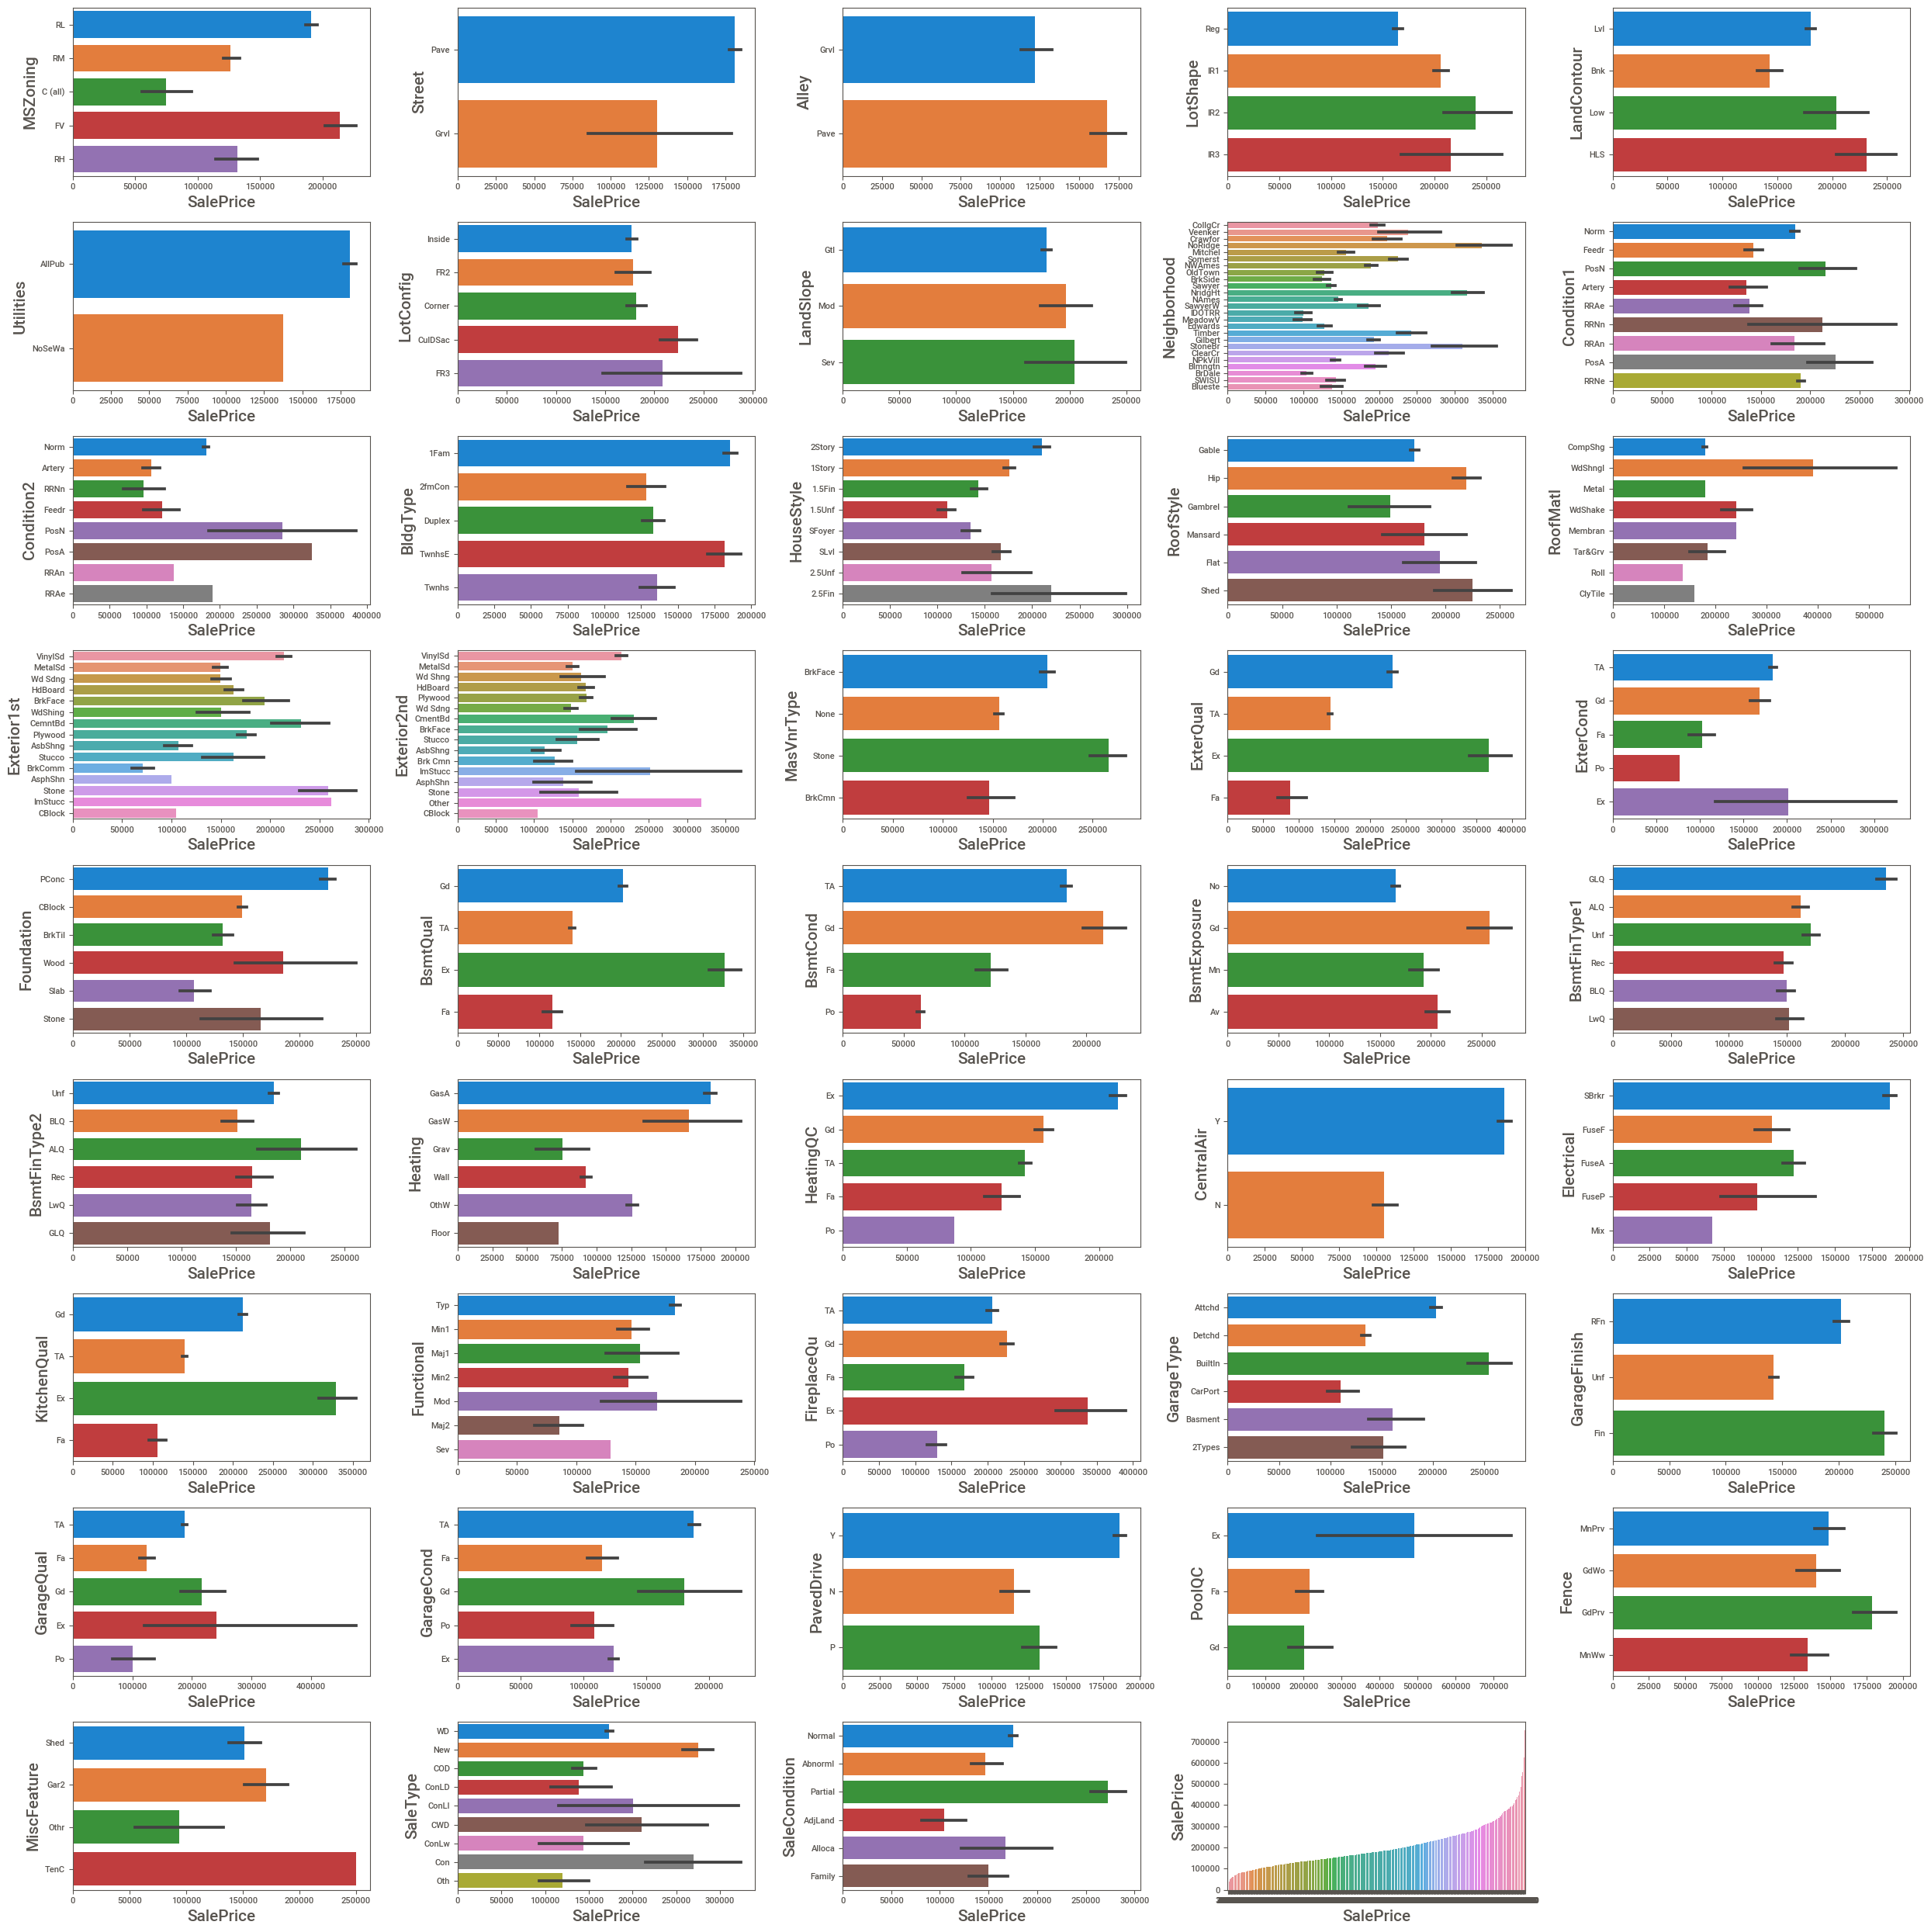

In [ ]:

plt.figure(figsize=(25,25))
plotnumber = 1

for column in cat_data:
    if plotnumber<=45 :
        ax = plt.subplot(9,5,plotnumber)
        sns.barplot(x=data.SalePrice,y=cat_data[column])
        plt.xlabel('SalePrice',fontsize=15)
        plt.ylabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

* sales price is varies according to neighborhood,housestyle,roofmatl,roofstyle,exterior condition and quality,building type,lot config,mszone,flatness of property
* Masonry veneer type stone work has highest salesprice,concrete foundation having highest saleprice
* basement, condition basement quality also influence the price range
* price range vareis according to the material of the things used in the house and also the quality of those facilities


In [ ]:
cat_data.shape

(1460, 44)

# **4)Data preprocessing**

* **Handling with missing values**


In [ ]:
nud

0
Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
...            ...
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0

[81 rows x 1 columns]

In [ ]:
nud/len(data)

0
Id             0.000000
MSSubClass     0.000000
MSZoning       0.000000
LotFrontage    0.177397
LotArea        0.000000
...                 ...
MoSold         0.000000
YrSold         0.000000
SaleType       0.000000
SaleCondition  0.000000
SalePrice      0.000000

[81 rows x 1 columns]

Fetures alley,poolqc,fence,miscfeature are having more than 80% missing values so dropping these features from the dataset.



In [ ]:
data1=data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)


In [ ]:
data1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [ ]:
print(data1[['GarageCond','GarageQual','GarageFinish','GarageYrBlt','GarageType','FireplaceQu','Electrical','BsmtFinType2',
           'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrArea','MasVnrType','LotFrontage']].dtypes)

GarageCond       object
GarageQual       object
GarageFinish     object
GarageYrBlt     float64
GarageType       object
FireplaceQu      object
Electrical       object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
LotFrontage     float64
dtype: object


*  in categorical categories missing values are replacing with mode


In [ ]:
print(data1[['GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','Electrical','BsmtFinType2',
           'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']].mode())

  GarageCond GarageQual GarageFinish GarageType FireplaceQu Electrical  \
0         TA         TA          Unf     Attchd          Gd      SBrkr   

  BsmtFinType2 BsmtFinType1 BsmtExposure BsmtCond BsmtQual MasVnrType  
0          Unf          Unf           No       TA       TA       None  


In [ ]:
data1.loc[data1['GarageCond'].isnull()==True,'GarageCond']='TA'
data1.loc[data1['GarageQual'].isnull()==True,'GarageQual']='TA'
data1.loc[data1['GarageFinish'].isnull()==True,'GarageFinish']='Unf'
data1.loc[data1['GarageType'].isnull()==True,'GarageType']='Attchd'
data1.loc[data1['FireplaceQu'].isnull()==True,'FireplaceQu']='Gd'
data1.loc[data1['Electrical'].isnull()==True,'Electrical']='SBrkr'
data1.loc[data1['BsmtFinType2'].isnull()==True,'BsmtFinType2']='Unf'
data1.loc[data1['BsmtFinType1'].isnull()==True,'BsmtFinType1']='Unf'
data1.loc[data1['BsmtExposure'].isnull()==True,'BsmtExposure']='No'
data1.loc[data1['BsmtCond'].isnull()==True,'BsmtCond']='TA'
data1.loc[data1['BsmtQual'].isnull()==True,'BsmtQual']='TA'
data1.loc[data1['MasVnrType'].isnull()==True,'MasVnrType']='None'


In [ ]:
print(data1[['GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','Electrical','BsmtFinType2',
           'BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']].isnull().sum())

GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
FireplaceQu     0
Electrical      0
BsmtFinType2    0
BsmtFinType1    0
BsmtExposure    0
BsmtCond        0
BsmtQual        0
MasVnrType      0
dtype: int64


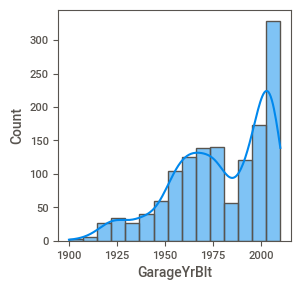

In [ ]:
#GarageYrBlt
plt.figure(figsize=(3,3))
sns.histplot(data=data1,x="GarageYrBlt",kde=True)
plt.show()

In [ ]:
data1.loc[data1['GarageYrBlt'].isnull()==True,'GarageYrBlt']=data1['GarageYrBlt'].median()

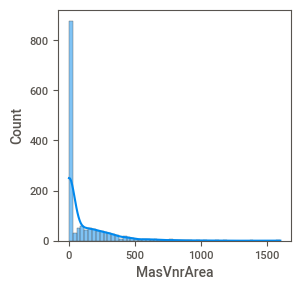

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(data=data1,x="MasVnrArea",kde=True)
plt.show()

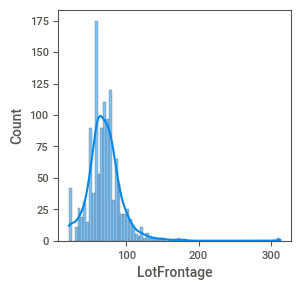

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(data=data1,x="LotFrontage",kde=True)
plt.show()

In [ ]:
data1[['LotFrontage','MasVnrArea']].median()

LotFrontage    69.0
MasVnrArea      0.0
dtype: float64

In [ ]:
data1.loc[data1['MasVnrArea'].isnull()==True,'MasVnrArea']=data1['MasVnrArea'].median()
data1.loc[data1['LotFrontage'].isnull()==True,'LotFrontage']=data1['LotFrontage'].median()

In [ ]:
data1[['LotFrontage','MasVnrArea','GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [ ]:
# Check for duplicates
data1.duplicated().sum()

0

-->  **Handling outliers**

In [ ]:
num_data=data1.select_dtypes(include=["int64","float64"])
num_data.columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

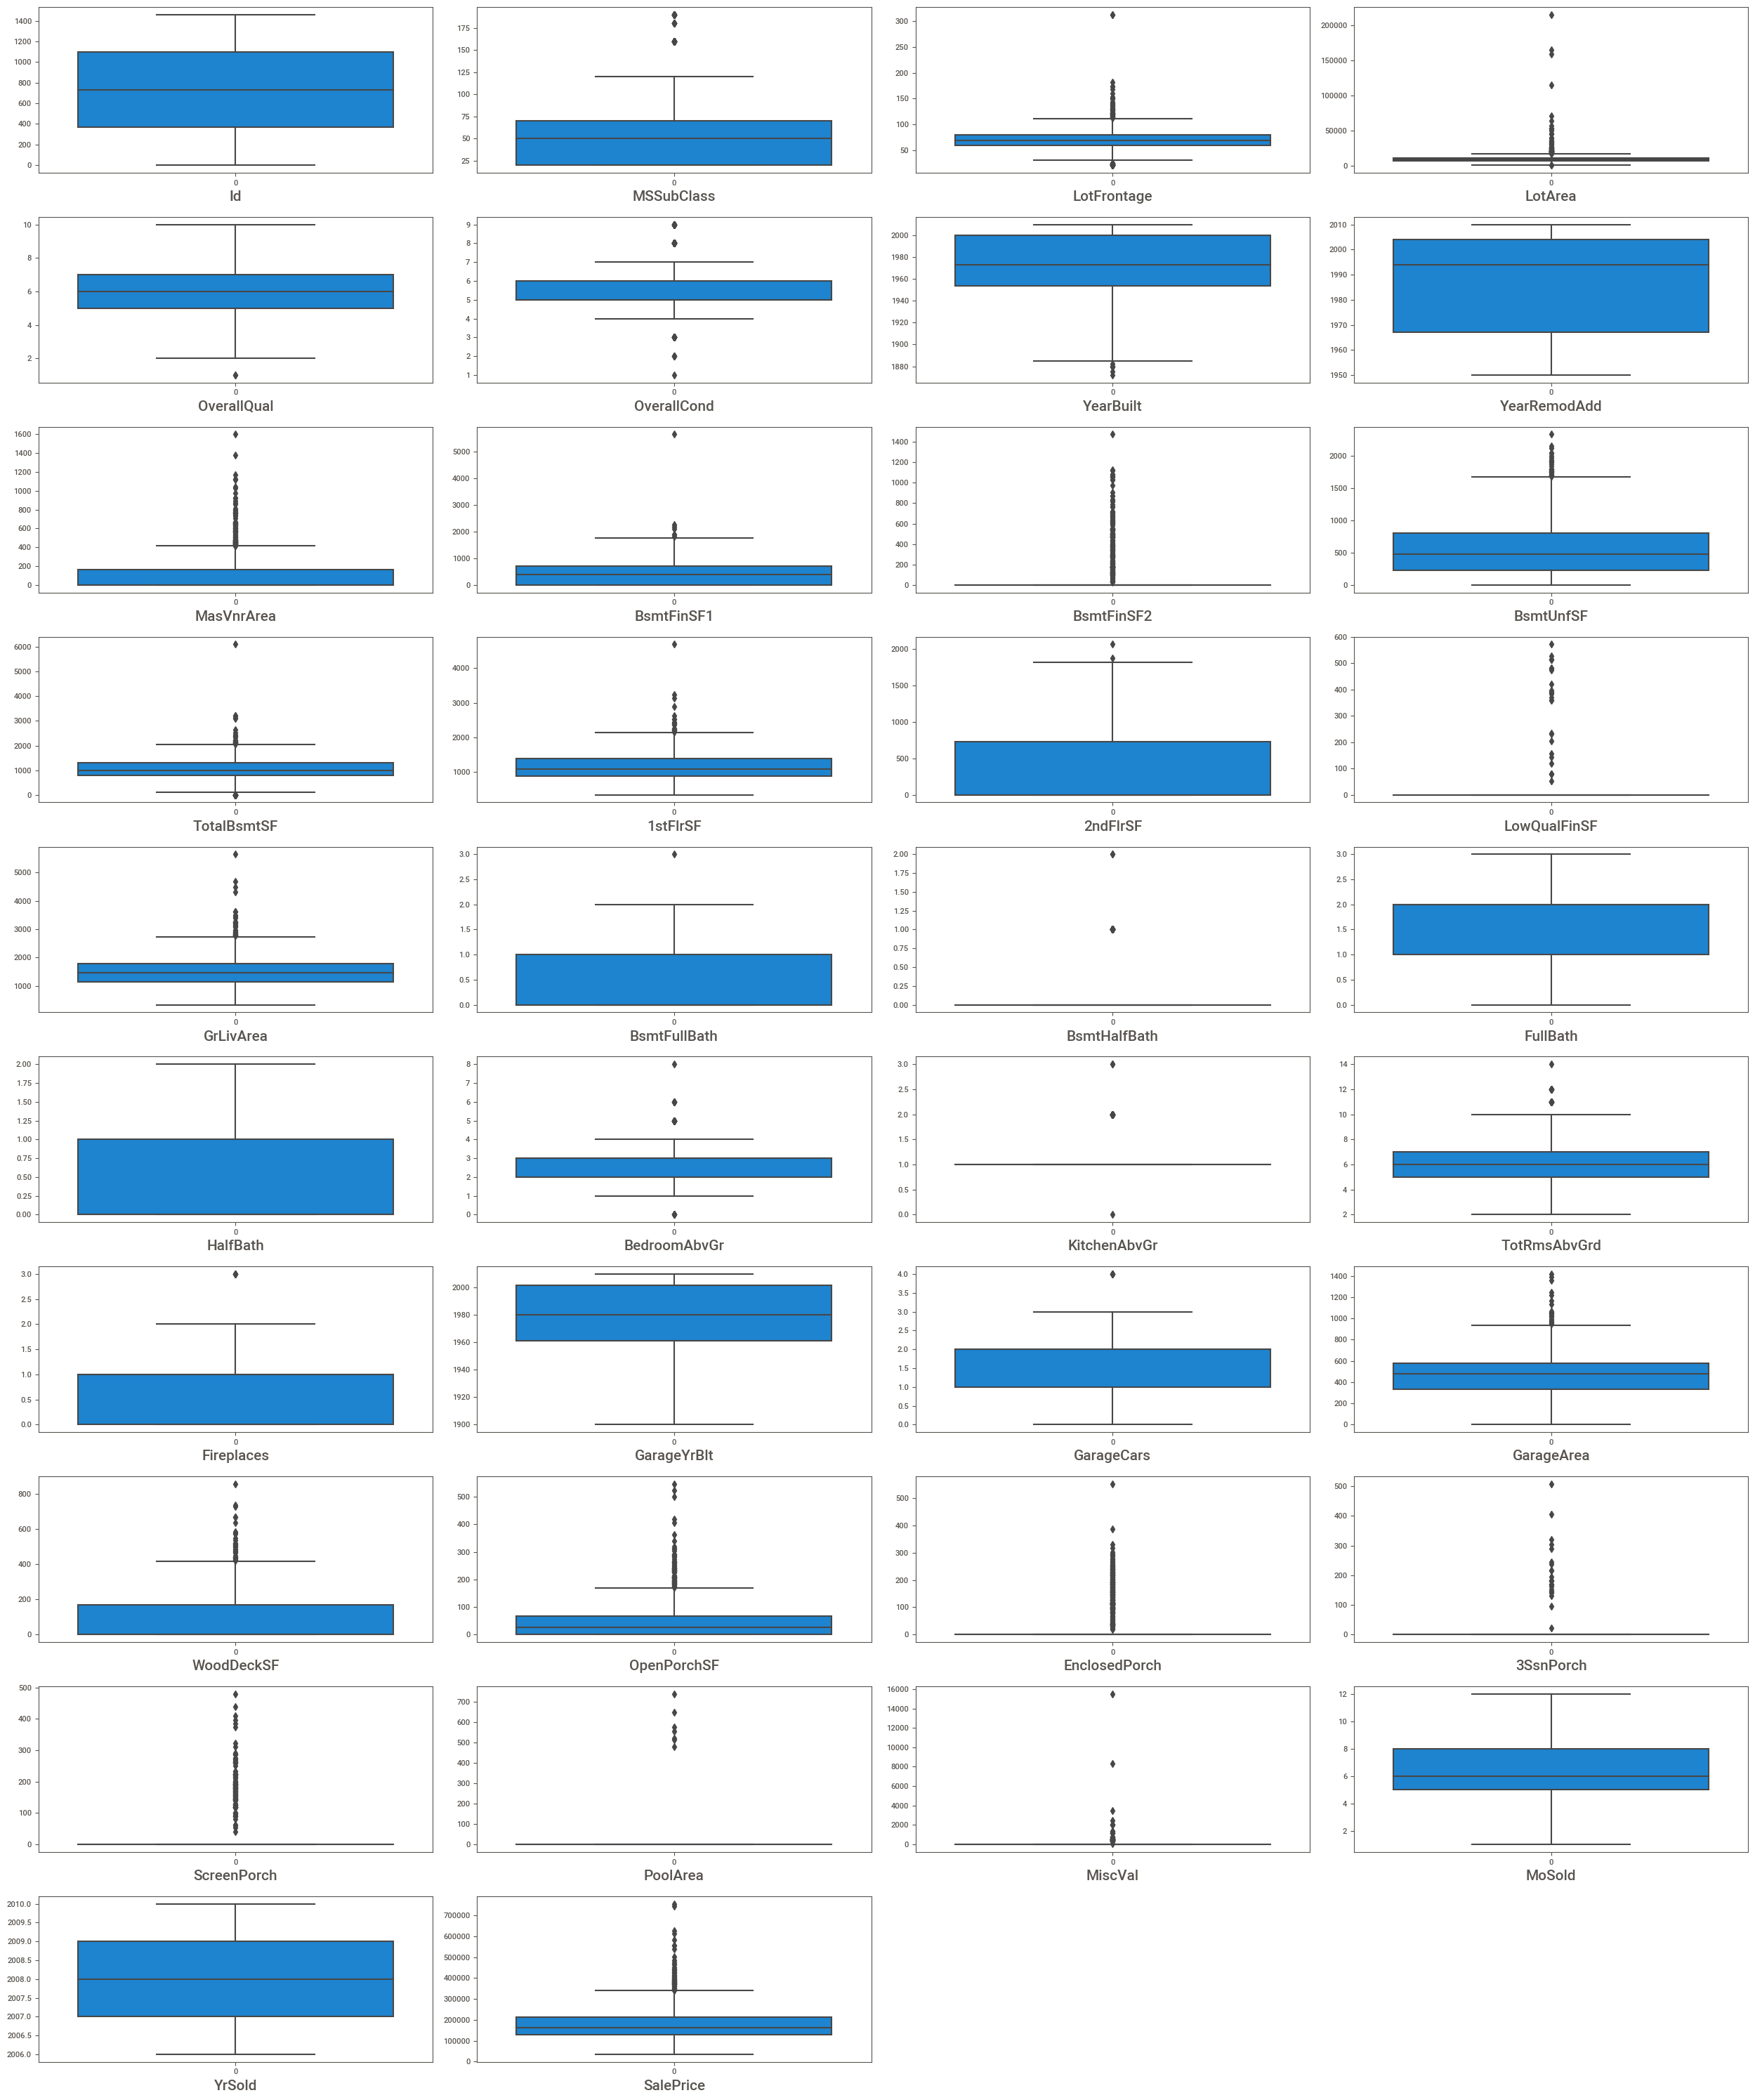

In [ ]:
plt.figure(figsize=(25,30),facecolor='white')

plotnumber=1

for column in num_data:
    if plotnumber<=40 :
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [ ]:
from scipy import stats

In [ ]:
for i in num_data:
         IQR = stats.iqr(num_data[i], interpolation = 'midpoint')
         Q1 = num_data[i].quantile(0.25)
         Q3 =num_data[i].quantile(0.75)
         min_limit=Q1 - 1.5*IQR
         max_limit=Q3 +1.5*IQR
         print(i)
         print('lwlmt',min_limit)
         print('uplmt',max_limit)
         print('percentage of uplmt',len(num_data.loc[num_data[i] > max_limit])/len(data1)*100)
         print('percentage of lwlmt',len(num_data.loc[num_data[i] < min_limit])/len(data1)*100)
         s= len(num_data.loc[num_data[i] > max_limit])/len(data1)*100 + len(num_data.loc[num_data[i] < min_limit])/len(data1)*100
         print(s)
         if s<=5.0:
          print("median is {}".format( data1[i].median()))
          data1.loc[data1[i]<min_limit,i]=data1[i].median()
          data1.loc[data1[i]>max_limit,i]=data1[i].median()
         print("**********************")

Id
lwlmt -729.25
uplmt 2190.25
percentage of uplmt 0.0
percentage of lwlmt 0.0
0.0
median is 730.5
**********************
MSSubClass
lwlmt -55.0
uplmt 145.0
percentage of uplmt 7.054794520547945
percentage of lwlmt 0.0
7.054794520547945
**********************
LotFrontage
lwlmt 31.5
uplmt 107.5
percentage of uplmt 3.9726027397260277
percentage of lwlmt 3.287671232876712
7.260273972602739
**********************
LotArea
lwlmt 1472.5
uplmt 17682.5
percentage of uplmt 4.589041095890411
percentage of lwlmt 0.0684931506849315
4.657534246575342
median is 9478.5
**********************
OverallQual
lwlmt 2.0
uplmt 10.0
percentage of uplmt 0.0
percentage of lwlmt 0.136986301369863
0.136986301369863
median is 6.0
**********************
OverallCond
lwlmt 3.5
uplmt 7.5
percentage of uplmt 6.438356164383562
percentage of lwlmt 2.1232876712328768
8.561643835616438
**********************
YearBuilt
lwlmt 1885.0
uplmt 2069.0
percentage of uplmt 0.0
percentage of lwlmt 0.4794520547945206
0.4794520547945206

 MSSubClass,LotFrontage,OverallCond,MasVnrArea,BsmtFinSF2,BsmtHalfBath,OpenPorchSF,EnclosedPorch,ScreenPorch has more than 5% of outlier so outliers are not handled in these features
 * in other features outliiers are replaced with median beacuse data is skewed

In [ ]:
i=data1[['LotArea','OverallQual','YearBuilt','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','MiscVal','PoolArea','3SsnPorch',
         'WoodDeckSF','GarageArea','GarageCars','GarageYrBlt','Fireplaces','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','BsmtFullBath','GrLivArea']]


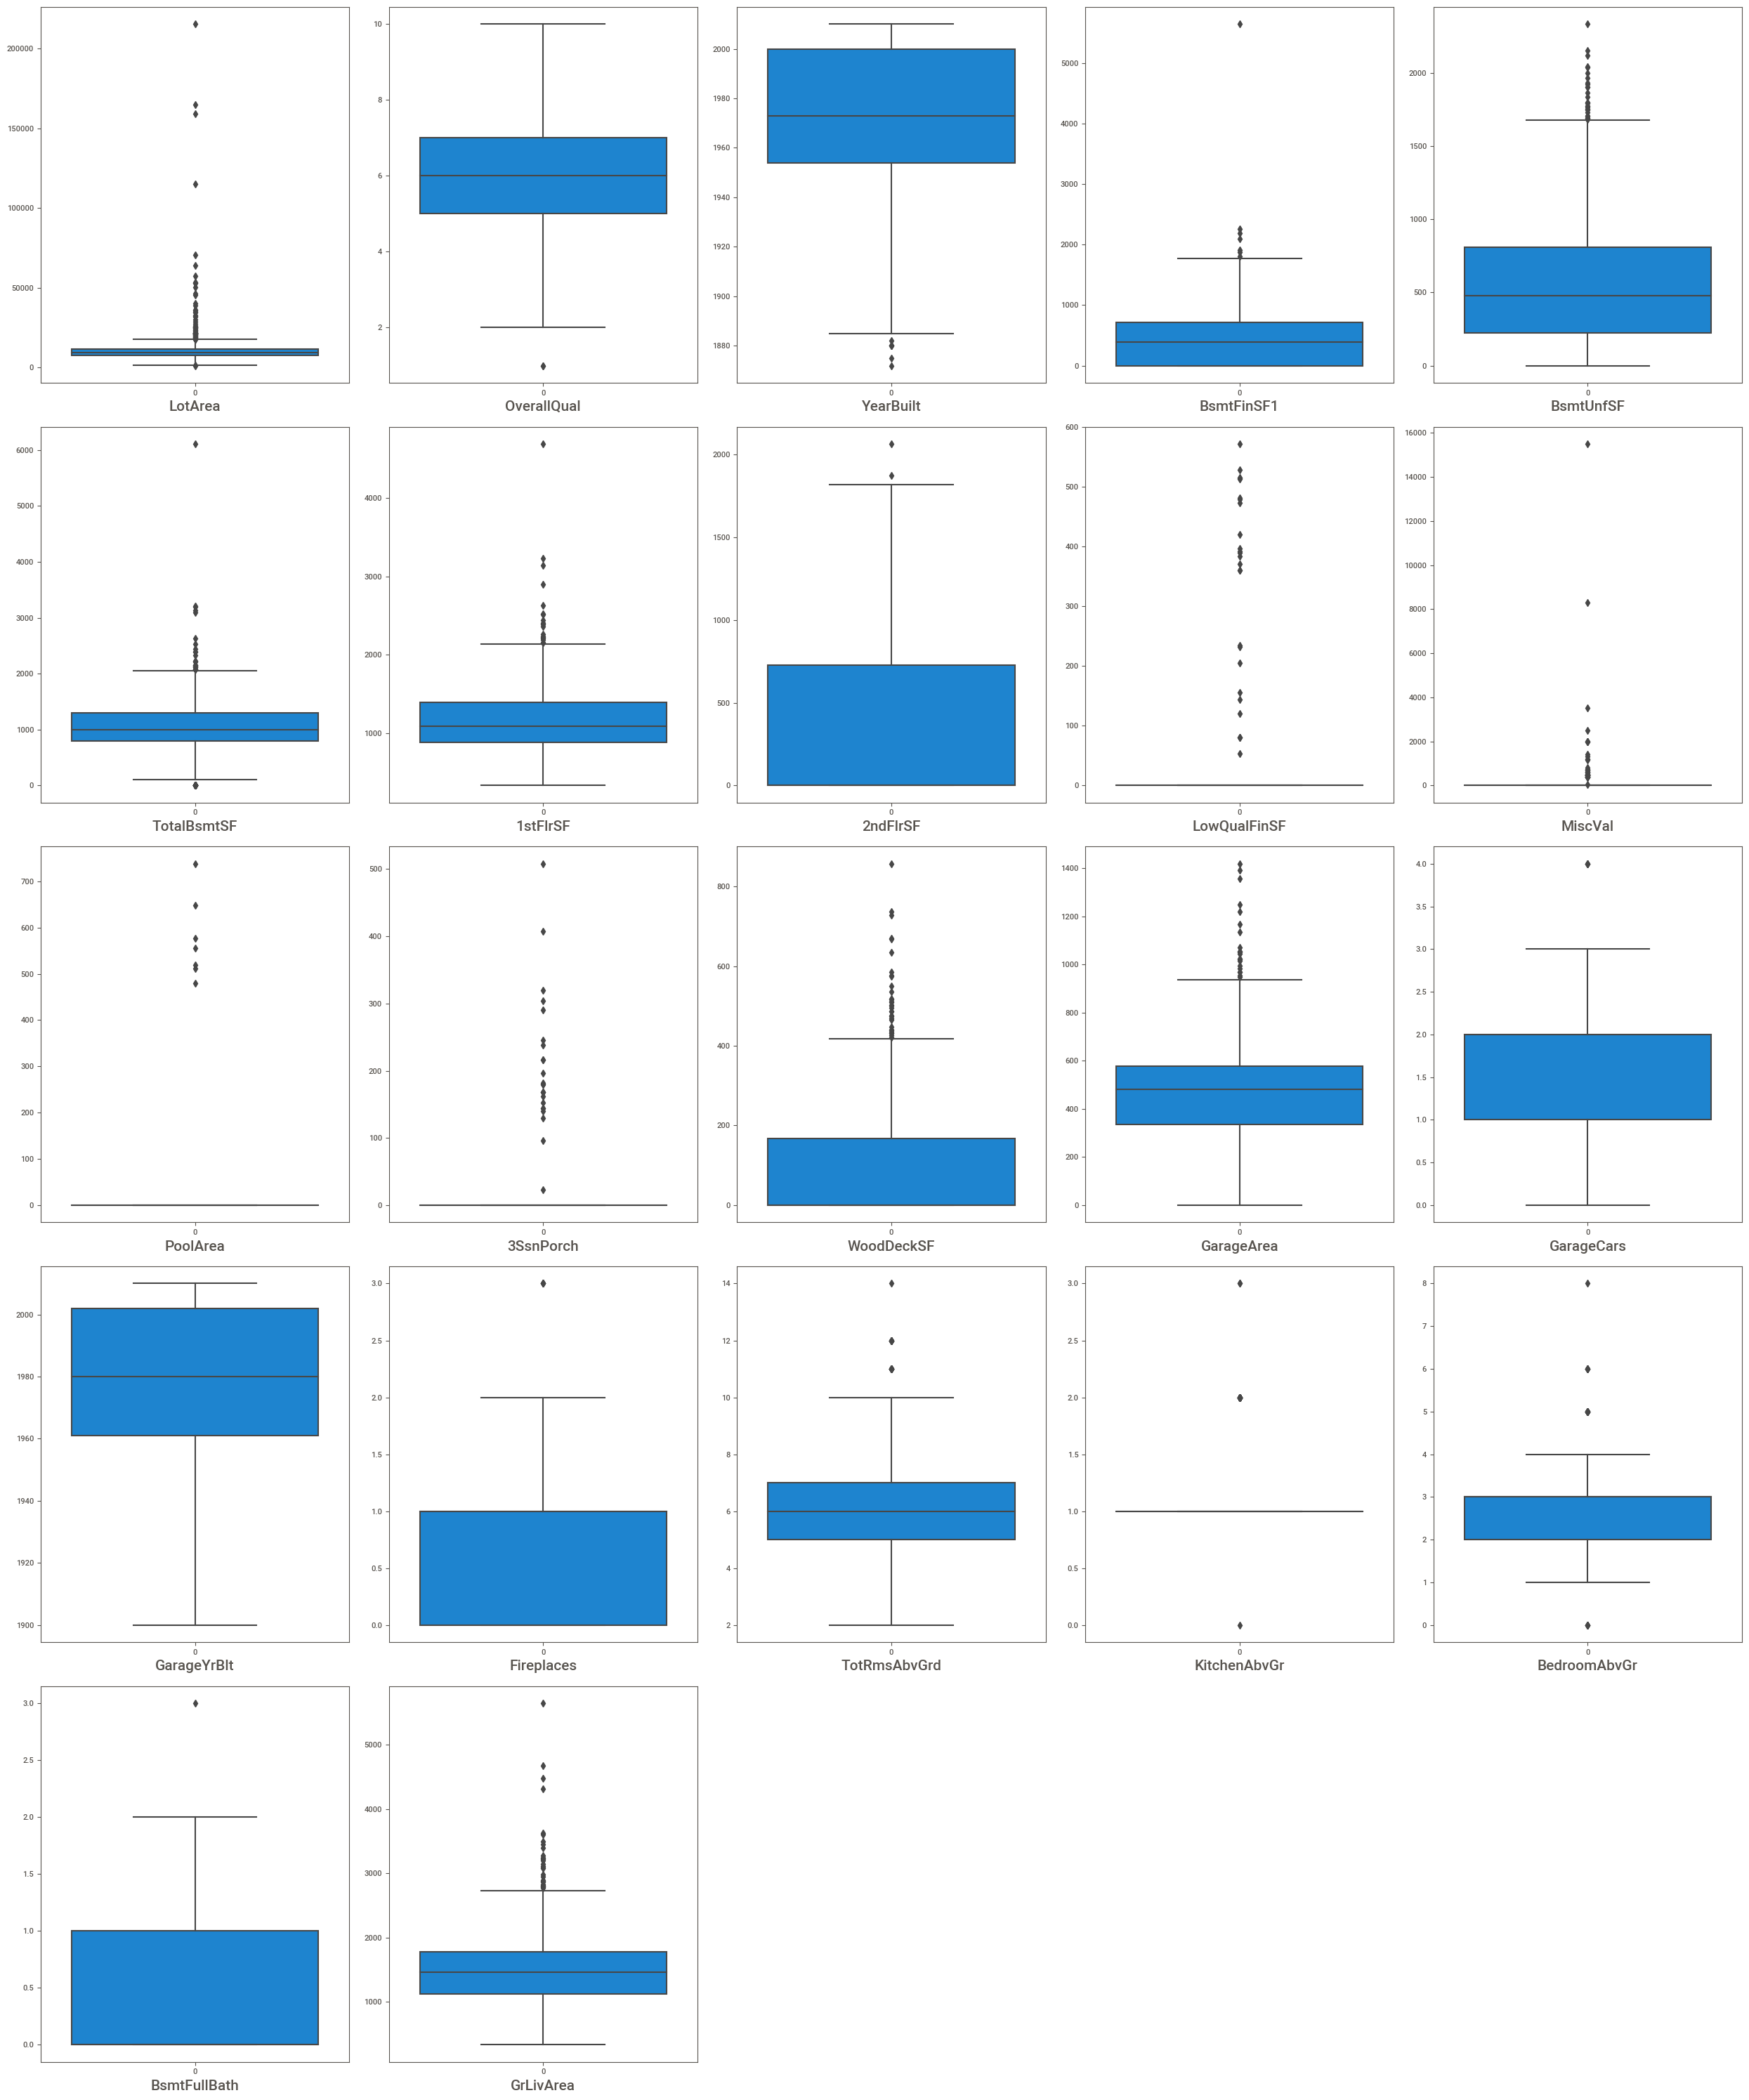

In [ ]:
plt.figure(figsize=(25,30),facecolor='white')

plotnumber=1

for clmn in i:
    if plotnumber<=25 :
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data[clmn])
        plt.xlabel(clmn,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [ ]:
for ot in i:
         IQR = stats.iqr(i[ot], interpolation = 'midpoint')
         Q1 = i[ot].quantile(0.25)
         Q3 =i[ot].quantile(0.75)
         min_limit=Q1 - 1.5*IQR
         max_limit=Q3 +1.5*IQR
         print(ot)
         print('lwlmt',min_limit)
         print('uplmt',max_limit)
         print('percentage of uplmt',len(i.loc[i[ot] > max_limit])/len(data1)*100)
         print('percentage of lwlmt',len(i.loc[i[ot] < min_limit])/len(data1)*100)


LotArea
lwlmt 2230.75
uplmt 16436.0
percentage of uplmt 1.643835616438356
percentage of lwlmt 2.1232876712328768
OverallQual
lwlmt 2.0
uplmt 10.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
YearBuilt
lwlmt 1885.0
uplmt 2069.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
BsmtFinSF1
lwlmt -1054.5
uplmt 1757.0
percentage of uplmt 0.0684931506849315
percentage of lwlmt 0.0
BsmtUnfSF
lwlmt -611.75
uplmt 1614.0
percentage of uplmt 0.8904109589041096
percentage of lwlmt 0.0
TotalBsmtSF
lwlmt 142.5
uplmt 1938.0
percentage of uplmt 0.8904109589041096
percentage of lwlmt 0.0684931506849315
1stFlrSF
lwlmt 153.0
uplmt 2097.0
percentage of uplmt 0.410958904109589
percentage of lwlmt 0.0
2ndFlrSF
lwlmt -1092.0
uplmt 1820.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
LowQualFinSF
lwlmt 0.0
uplmt 0.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
MiscVal
lwlmt 0.0
uplmt 0.0
percentage of uplmt 0.0
percentage of lwlmt 0.0
PoolArea
lwlmt 0.0
uplmt 0.0
percentage of uplmt 0.0
percentage of lw

-->**Converting categorical data into numerical data**

In [ ]:
data1.to_csv('data1.csv')

In [ ]:
ob=data1.select_dtypes(include=['O'])

In [ ]:
for i in ob:
    print(i,data1[i].unique())
    print(data1[i].value_counts())
    print("**********************")

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
**********************
Street ['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64
**********************
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
**********************
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
**********************
Utilities ['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
**********************
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
**********************
LandSlope ['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
**********************
Neighborhood ['CollgCr' 'Veenker' 'Craw

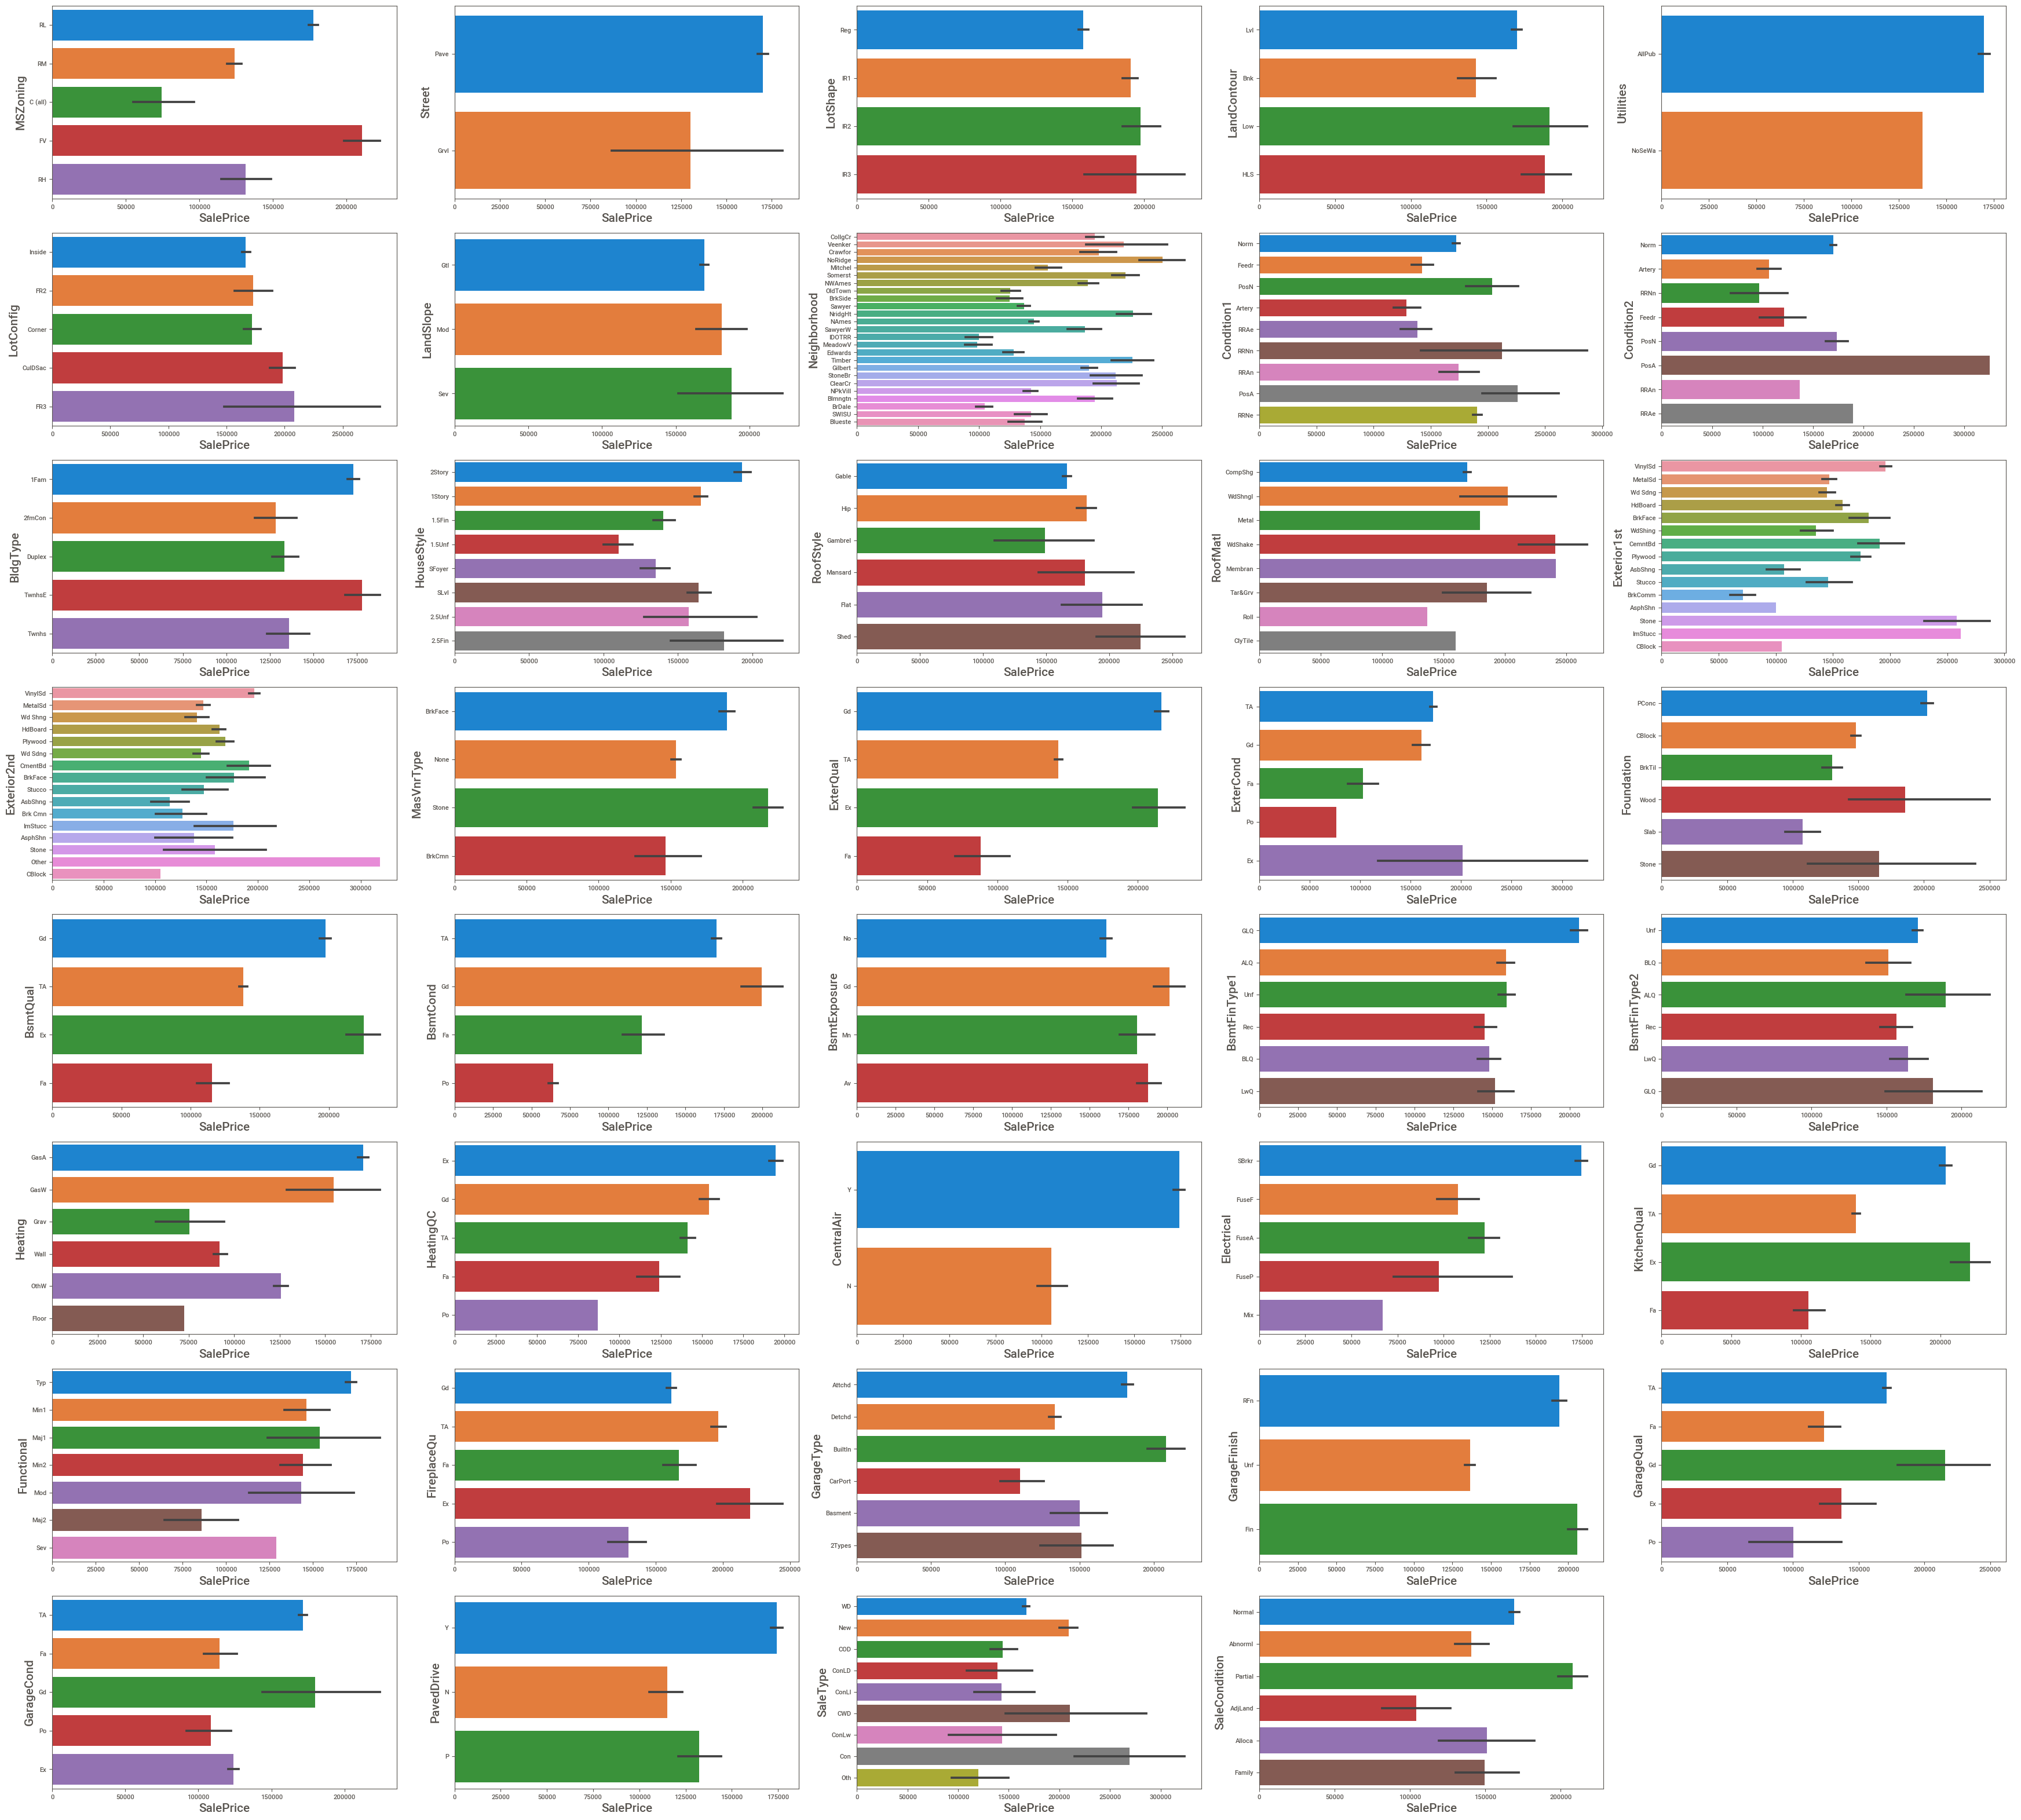

In [ ]:
plt.figure(figsize=(35,35))
plotnumber = 1

for i in ob:
    if plotnumber<=45 :
        ax = plt.subplot(9,5,plotnumber)
        sns.barplot(x=data1.SalePrice,y=ob[i])
        plt.xlabel('SalePrice',fontsize=15)
        plt.ylabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

* Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data1.CentralAir=lc.fit_transform(data1.CentralAir)
data1.PavedDrive=lc.fit_transform(data1.PavedDrive)


* one hot

In [ ]:
df=pd.get_dummies(data1['Street'],prefix='Street',drop_first=True)
data1=pd.concat([data1,df],axis=1).drop(['Street'],axis=1)

In [ ]:
df=pd.get_dummies(data1['Utilities'],prefix='Utilities',drop_first=True)
data1=pd.concat([data1,df],axis=1).drop(['Utilities'],axis=1)
df=pd.get_dummies(data1['LandSlope'],prefix='LandSlope',drop_first=True)
data1=pd.concat([data1,df],axis=1).drop(['LandSlope'],axis=1)

* Manual encoding

<Axes: xlabel='MSZoning', ylabel='Count'>

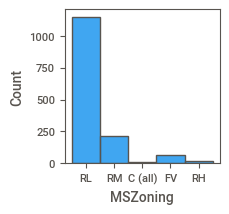

In [ ]:
plt.figure(figsize=(2,2))
sns.histplot(data=data['MSZoning'])

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

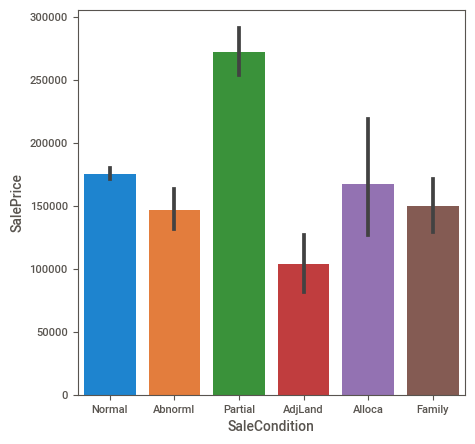

In [ ]:
plt.figure(figsize=(5,5))

sns.barplot(data=ob,y=data['SalePrice'],x=ob['SaleCondition'])

In [ ]:

man_en = {"MSZoning": {"FV":4 , "RL":3 ,'RH':2,'RM':1,'C (all)':0},
          'LotShape': {'Reg':0, 'IR1':1 ,'IR2':3 ,'IR3':2},
          'Condition1':{'Artery':0, 'RRAe':1, 'Feedr':2,'RRAn':3,'Norm':4,'RRNe':5,'RRNn':6,'PosN':7,'PosA':8 },
           'Condition2':{'RRNn':0,'Artery':1,'Feedr':2,'RRAn':3,'Norm':4,'RRAe':5,'PosN':6,'PosA':7},
           'RoofStyle':{'Gambrel':0,'Gable':1,'Mansard':2,'Flat':3,'Hip':4,'Shed':5},
           'MasVnrType':{'BrkCmn':0,'None':1,'BrkFace':2,'Stone':3},
          'HeatingQC':{'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0},
            'KitchenQual': {'Ex':3,'Gd':2, 'TA':1,  'Fa':0},
            'GarageQual' :{'Ex':4,'Gd':3,'TA':2,'Fa' :1, 'Po':0},
          'GarageCond' :{ 'Fa':0, 'Po':1,'Ex':2,'Gd':3,'TA':4},
          'SaleType' :{ 'New':8,'Con':7, 'CWD':6,'ConLI':5,'WD':4,'COD':3,'ConLw':2,'ConLD':1, 'Oth':0},
          'SaleCondition':{'Partial':5,'Normal':4,'Alloca':3,'Family':2, 'Abnorml':1,  'AdjLand':0}}




data1 = data1.replace(man_en)
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape LandContour  \
0  1.0          60         3         65.0   8450.0         0         Lvl   
1  2.0          20         3         80.0   9600.0         0         Lvl   
2  3.0          60         3         68.0  11250.0         1         Lvl   
3  4.0          70         3         60.0   9550.0         1         Lvl   
4  5.0          60         3         84.0  14260.0         1         Lvl   

  LotConfig Neighborhood  Condition1  ...  MiscVal MoSold YrSold  SaleType  \
0    Inside      CollgCr           4  ...        0      2   2008         4   
1       FR2      Veenker           2  ...        0      5   2007         4   
2    Inside      CollgCr           4  ...        0      9   2008         4   
3    Corner      Crawfor           4  ...        0      2   2006         4   
4       FR2      NoRidge           4  ...        0     12   2008         4   

   SaleCondition  SalePrice  Street_Pave  Utilities_NoSeWa LandSlope_Mod  \
0              4     208500            1                 0             0   
1              4     181500            1                 0             0   
2              4     223500            1                 0             0   
3              1     140000            1                 0             0   
4              4     250000            1                 0             0   

  LandSlope_Sev  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 78 columns]

* Frequency encoder

In [ ]:
#frequency
#LandContour,LotConfig,BldgType,HouseStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,
#BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,GarageFinish,Neighborhood

In [ ]:
print(data1.FireplaceQu.unique())
data1['FireplaceQu'].value_counts()


['Gd' 'TA' 'Fa' 'Ex' 'Po']


Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [ ]:
fre_en={'LandContour':{'Lvl':3, 'Bnk':2, 'HLS':1,'Low':0},
        'Neighborhood':{'NAmes':24,'CollgCr':23,'OldTown':22,'Edwards':21,'Somerst':20,'Gilbert':19,'NridgHt':18,'Sawyer':17,'NWAmes':16,
                         'SawyerW':15,'BrkSide':14,'Crawfor':13,'Mitchel':12,'NoRidge':11,'Timber':10, 'IDOTRR':9,'ClearCr':8, 'StoneBr':7,
                         'SWISU':6,'MeadowV':5,'Blmngtn':4 ,'BrDale':3,'Veenker':2,'NPkVill':1,'Blueste':0},
        'LotConfig':{'Inside':4,'Corner':3,'CulDSac':2,'FR2':1,'FR3':0},
          'BldgType':{'1Fam':4,'TwnhsE':3,'Duplex':2,'Twnhs':1,'2fmCon':0},
         'HouseStyle':{ '1Story':7,'2Story':6, '1.5Fin':5,'SLvl' :4,'SFoyer':3, '1.5Unf':2,  '2.5Unf' :1,'2.5Fin':0},
        'RoofMatl':{'CompShg':7, 'Tar&Grv':6,'WdShngl':5, 'WdShake':4,'Metal' :3, 'Membran':2,  'Roll':1,'ClyTile':0},
        'Exterior1st':{'VinylSd':14, 'HdBoard':13,'MetalSd':12, 'Wd Sdng':11  ,'Plywood':10, 'CemntBd':9,'BrkFace':8, 'WdShing':7,
                         'Stucco':6,'AsbShng':5, 'BrkComm':4,'Stone':3 ,'AsphShn':2,'ImStucc':1, 'CBlock':0},
        'Exterior2nd':{'VinylSd':15, 'MetalSd':14,'HdBoard':13, 'Wd Sdng':12,  'Plywood':11,'CmentBd':10 ,'Wd Shng':9,'Stucco':8,
                       'BrkFace':7 , 'AsbShng':6,'ImStucc':5,'Brk Cmn':4,  'Stone':3,'AsphShn':2, 'Other':1, 'CBlock':0},
        'ExterQual':{'TA':3,'Gd':2, 'Ex':1, 'Fa':0},
        'ExterCond':{'TA':4, 'Gd':3, 'Fa':2, 'Ex':1,'Po':0},
        'Foundation':{'PConc':5, 'CBlock':4, 'BrkTil':3, 'Slab':2, 'Stone':1,'Wood':0},
        'BsmtQual':{'TA':3,'Gd':2, 'Ex':1, 'Fa':0},
         'BsmtCond':{'TA':3,'Gd':2,'Fa':1,'Po':0},
        'BsmtExposure':{'No':3,'Av':2,'Gd':1,'Mn':0 },
        'BsmtFinType1':{'Unf':5,'GLQ':4,'ALQ':3,'BLQ':2,'Rec':1 ,'LwQ':0},
        'BsmtFinType2':{'Unf':5,'Rec':4,'LwQ':3,'BLQ':2,'ALQ':1,'GLQ':0},
        'Heating':{'GasA':5,'GasW':4,'Grav':3,'Wall':2,'OthW':1,'Floor':0},
        'Electrical':{'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0},
        'Functional':{'Typ':6, 'Min2':5,'Min1':4,'Mod':3 ,'Maj1':2,'Maj2':1, 'Sev':0},
        'GarageFinish':{'Unf':2,'RFn':1,'Fin':0},
        'GarageType':{'Attchd':5,'Detchd':4,'BuiltIn':3,'Basment':2,'CarPort':1,'2Types':0},
        'FireplaceQu':{'Gd':4,'TA':3,'Fa':2, 'Ex':1,'Po':0}}


data1 = data1.replace(fre_en)
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0  1.0          60         3         65.0   8450.0         0            3   
1  2.0          20         3         80.0   9600.0         0            3   
2  3.0          60         3         68.0  11250.0         1            3   
3  4.0          70         3         60.0   9550.0         1            3   
4  5.0          60         3         84.0  14260.0         1            3   

   LotConfig  Neighborhood  Condition1  ...  MiscVal  MoSold  YrSold  \
0          4            23           4  ...        0       2    2008   
1          1             2           2  ...        0       5    2007   
2          4            23           4  ...        0       9    2008   
3          3            13           4  ...        0       2    2006   
4          1            11           4  ...        0      12    2008   

   SaleType  SaleCondition  SalePrice  Street_Pave  Utilities_NoSeWa  \
0         4              4     208500            1                 0   
1         4              4     181500            1                 0   
2         4              4     223500            1                 0   
3         4              1     140000            1                 0   
4         4              4     250000            1                 0   

   LandSlope_Mod  LandSlope_Sev  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  

[5 rows x 78 columns]

In [ ]:
data1.select_dtypes(include=['O'])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1460 rows x 0 columns]

In [ ]:
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0  1.0          60         3         65.0   8450.0         0            3   
1  2.0          20         3         80.0   9600.0         0            3   
2  3.0          60         3         68.0  11250.0         1            3   
3  4.0          70         3         60.0   9550.0         1            3   
4  5.0          60         3         84.0  14260.0         1            3   

   LotConfig  Neighborhood  Condition1  ...  MiscVal  MoSold  YrSold  \
0          4            23           4  ...        0       2    2008   
1          1             2           2  ...        0       5    2007   
2          4            23           4  ...        0       9    2008   
3          3            13           4  ...        0       2    2006   
4          1            11           4  ...        0      12    2008   

   SaleType  SaleCondition  SalePrice  Street_Pave  Utilities_NoSeWa  \
0         4              4     208500            1                 0   
1         4              4     181500            1                 0   
2         4              4     223500            1                 0   
3         4              1     140000            1                 0   
4         4              4     250000            1                 0   

   LandSlope_Mod  LandSlope_Sev  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  

[5 rows x 78 columns]

# DATA SET

In [ ]:
data1.to_csv('capstone1_prepro.csv')

In [ ]:
df=data=pd.read_csv('/content/gdrive/My Drive/capstone project/PRCP-1020-HousePricePred/capstone1_prepro.csv')

In [ ]:
df.head()

Unnamed: 0   Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  \
0           0  1.0          60         3         65.0   8450.0         0   
1           1  2.0          20         3         80.0   9600.0         0   
2           2  3.0          60         3         68.0  11250.0         1   
3           3  4.0          70         3         60.0   9550.0         1   
4           4  5.0          60         3         84.0  14260.0         1   

   LandContour  LotConfig  Neighborhood  ...  MiscVal  MoSold  YrSold  \
0            3          4            23  ...        0       2    2008   
1            3          1             2  ...        0       5    2007   
2            3          4            23  ...        0       9    2008   
3            3          3            13  ...        0       2    2006   
4            3          1            11  ...        0      12    2008   

   SaleType  SaleCondition  SalePrice  Street_Pave  Utilities_NoSeWa  \
0         4              4     208500            1                 0   
1         4              4     181500            1                 0   
2         4              4     223500            1                 0   
3         4              1     140000            1                 0   
4         4              4     250000            1                 0   

   LandSlope_Mod  LandSlope_Sev  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  

[5 rows x 79 columns]

In [ ]:
df1=pd.DataFrame(df)
df1.head()

Unnamed: 0   Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  \
0           0  1.0          60         3         65.0   8450.0         0   
1           1  2.0          20         3         80.0   9600.0         0   
2           2  3.0          60         3         68.0  11250.0         1   
3           3  4.0          70         3         60.0   9550.0         1   
4           4  5.0          60         3         84.0  14260.0         1   

   LandContour  LotConfig  Neighborhood  ...  MiscVal  MoSold  YrSold  \
0            3          4            23  ...        0       2    2008   
1            3          1             2  ...        0       5    2007   
2            3          4            23  ...        0       9    2008   
3            3          3            13  ...        0       2    2006   
4            3          1            11  ...        0      12    2008   

   SaleType  SaleCondition  SalePrice  Street_Pave  Utilities_NoSeWa  \
0         4              4     208500            1                 0   
1         4              4     181500            1                 0   
2         4              4     223500            1                 0   
3         4              1     140000            1                 0   
4         4              4     250000            1                 0   

   LandSlope_Mod  LandSlope_Sev  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  

[5 rows x 79 columns]

**--> Feature engineering and scaling**

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0  1.0          60         3         65.0   8450.0         0            3   
1  2.0          20         3         80.0   9600.0         0            3   
2  3.0          60         3         68.0  11250.0         1            3   
3  4.0          70         3         60.0   9550.0         1            3   
4  5.0          60         3         84.0  14260.0         1            3   

   LotConfig  Neighborhood  Condition1  ...  MiscVal  MoSold  YrSold  \
0          4            23           4  ...        0       2    2008   
1          1             2           2  ...        0       5    2007   
2          4            23           4  ...        0       9    2008   
3          3            13           4  ...        0       2    2006   
4          1            11           4  ...        0      12    2008   

   SaleType  SaleCondition  SalePrice  Street_Pave  Utilities_NoSeWa  \
0         4              4     208500            1                 0   
1         4              4     181500            1                 0   
2         4              4     223500            1                 0   
3         4              1     140000            1                 0   
4         4              4     250000            1                 0   

   LandSlope_Mod  LandSlope_Sev  
0              0              0  
1              0              0  
2              0              0  
3              0              0  
4              0              0  

[5 rows x 78 columns]

In [ ]:
continuous_columns = df.select_dtypes(include=['number'])
continuous_columns.columns.shape

(78,)

In [ ]:
df2=df.copy()

<Axes: >

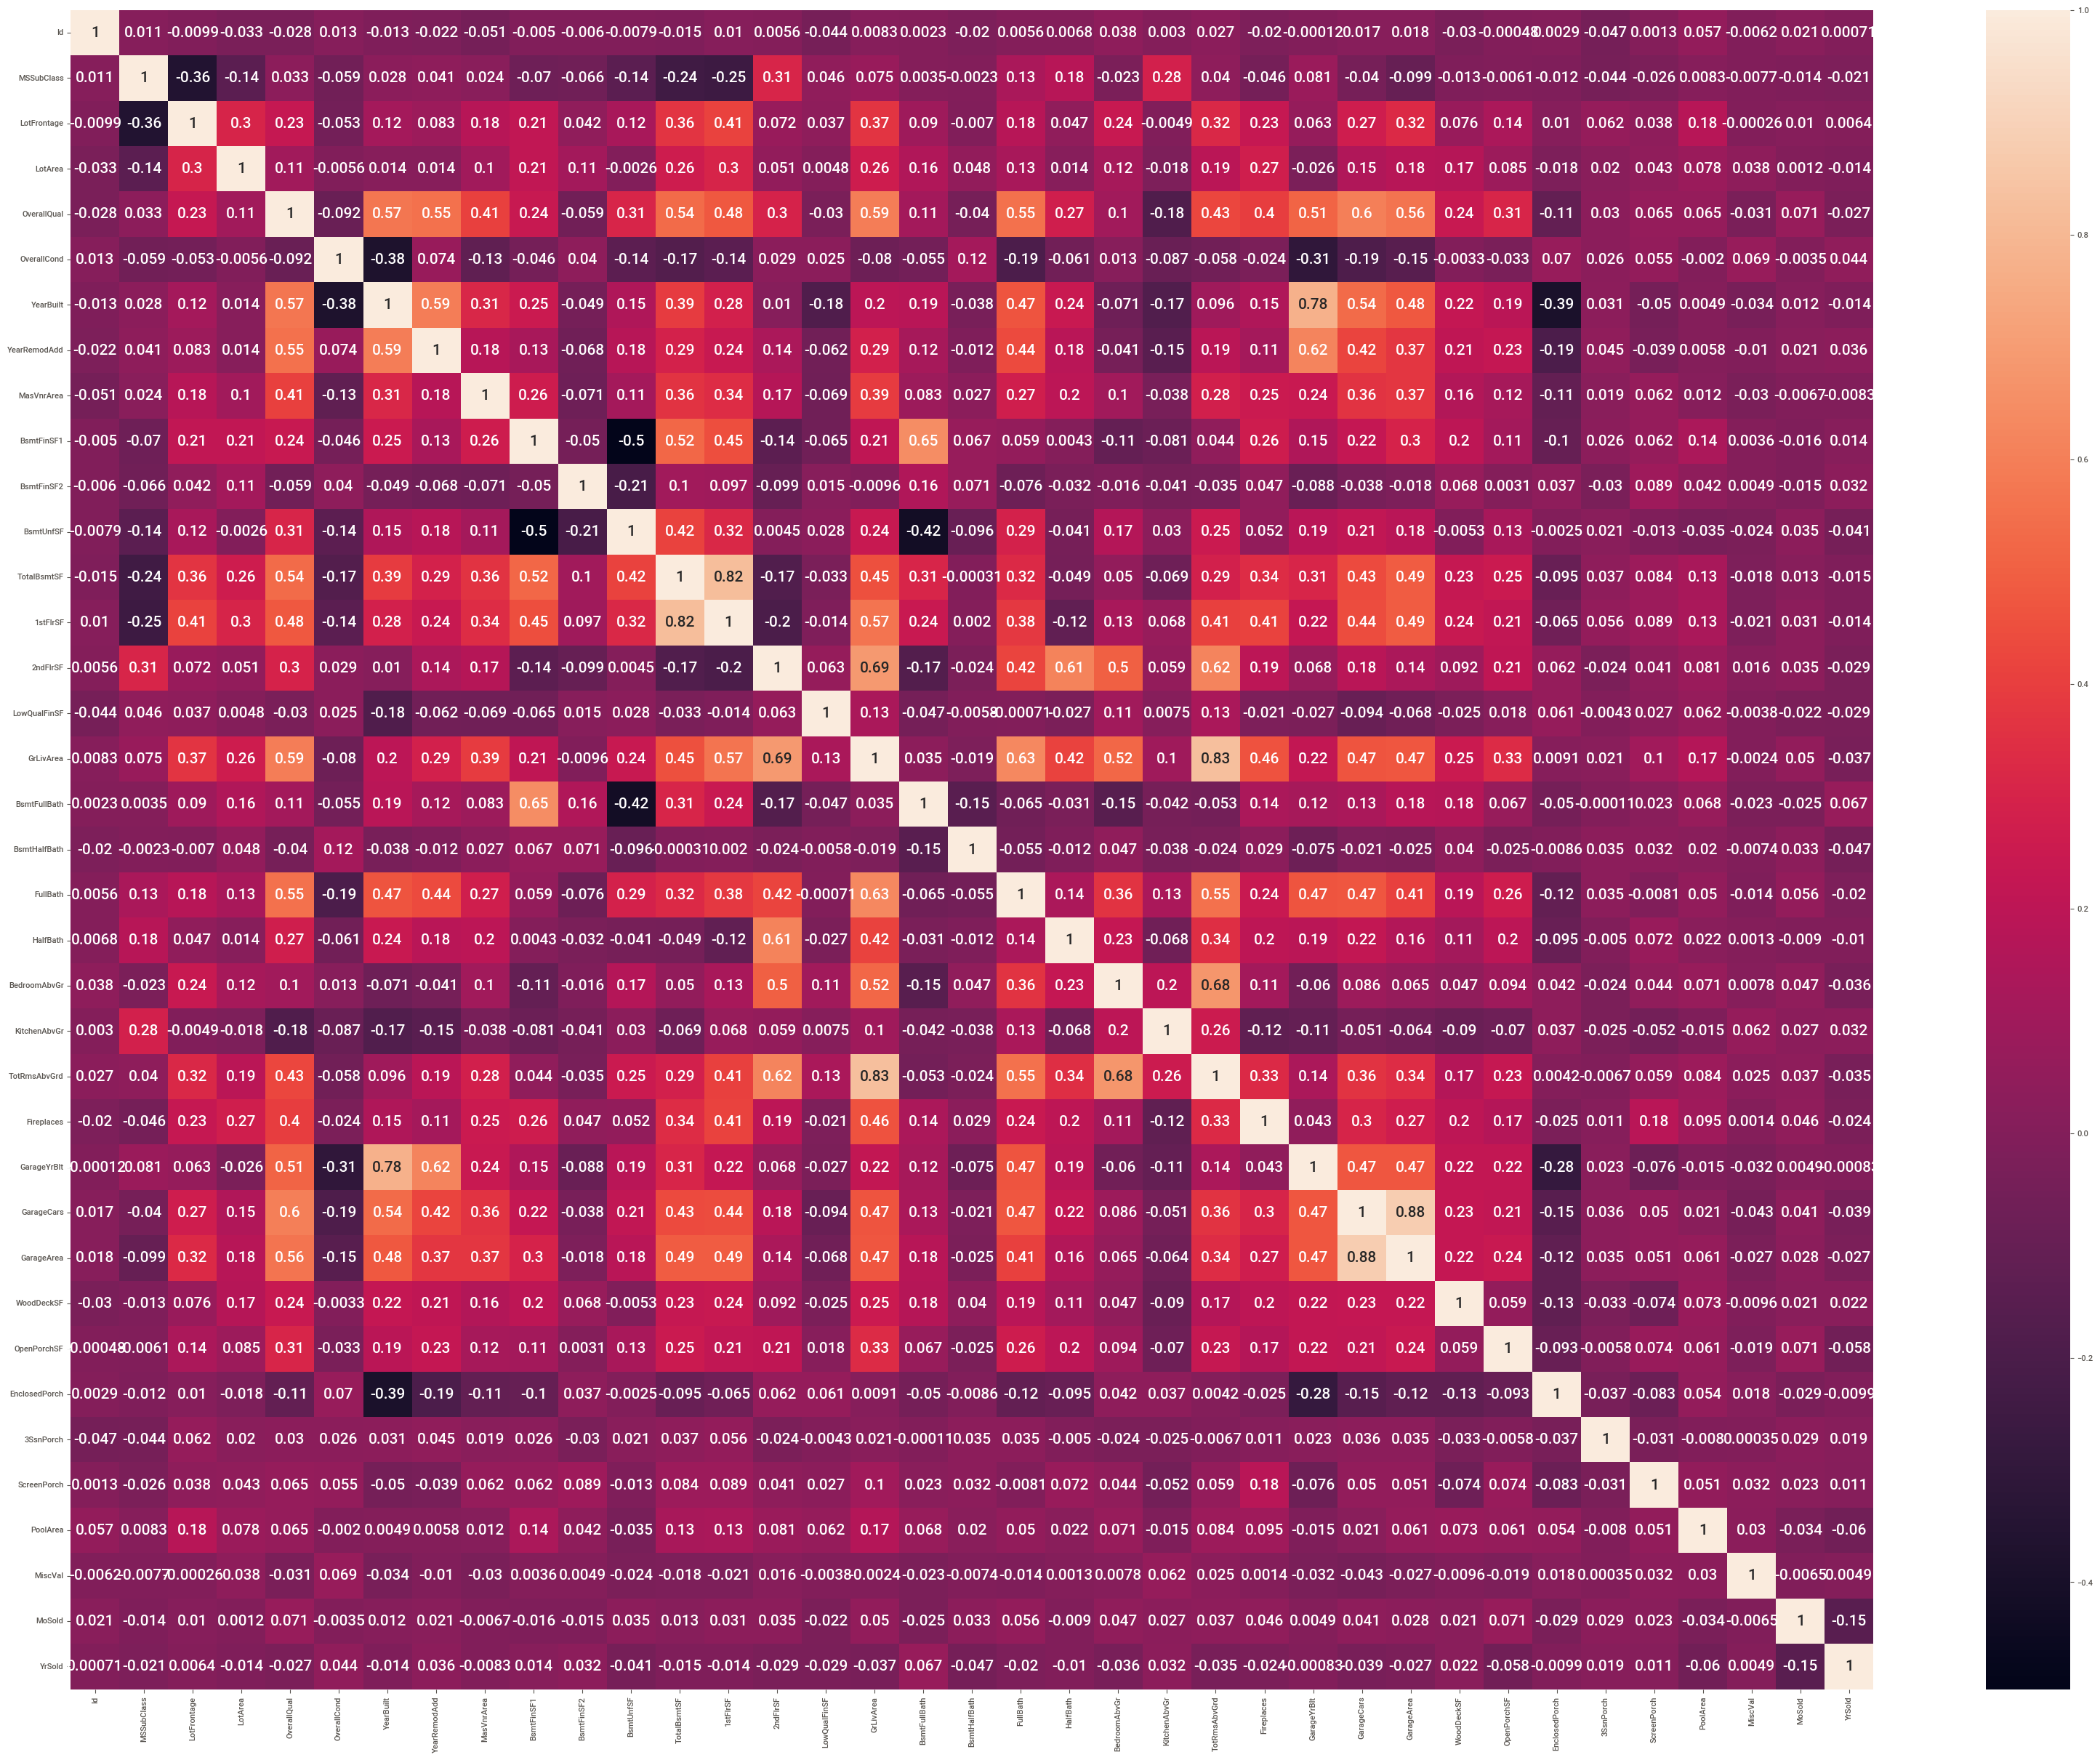

In [ ]:
plt.figure(figsize=(40,30))
sns.heatmap(num_data.drop(['SalePrice'],axis=1).corr(),annot=True, annot_kws={"size":15})

In [ ]:
df[['GarageArea','GarageCars','SalePrice']].corr()


GarageArea  GarageCars  SalePrice
GarageArea    1.000000    0.877548   0.581248
GarageCars    0.877548    1.000000   0.590731
SalePrice     0.581248    0.590731   1.000000

In [ ]:
df[['GarageArea','GarageCars']].corr()

GarageArea  GarageCars
GarageArea    1.000000    0.877548
GarageCars    0.877548    1.000000

In [ ]:
df.drop(['GarageArea'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
stanscale=StandardScaler()
stdf=stanscale.fit_transform(df.drop(['SalePrice'],axis=1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minscale=MinMaxScaler()
mindf=minscale.fit_transform(df.drop(['SalePrice'],axis=1))

# Model Creation

In [ ]:
df['SalePrice']=np.log(df['SalePrice']) #handling the skewness using log

In [ ]:
df.shape

(1460, 77)

In [ ]:
x=stdf #standard scaled data
y=df["SalePrice"]

In [ ]:
x.shape

(1460, 76)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1095, 76)
(365, 76)


In [ ]:
#minmax scaled data split
xmin=mindf
xmin_train,xmin_test,y_train,y_test=train_test_split(xmin, y,random_state=3)


In [ ]:
print(xmin_train.shape)
print(xmin_test.shape)

(1095, 76)
(365, 76)


# * **Linear regression**

In [ ]:
#standardscaled data
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)


In [ ]:
y_test

140     11.652687
950     11.767568
248     12.100712
1360    12.149502
568     12.665394
          ...    
1345    11.594505
999     12.235631
1012    12.013701
314     12.089539
596     11.648365
Name: SalePrice, Length: 365, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))


MSE: 0.02616351008661594
MAE: 0.11554877211835707
rmse: 0.1617513835694024
r2_score: 0.7566825139186337


In [ ]:
modelmin=LinearRegression()
modelmin.fit(xmin_train,y_train)
ymin_pred=modelmin.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.02616808505178266
MAE: 0.11555773141963964
rmse: 0.16176552491734034
r2_score: 0.7566399672947446


In [ ]:
adjusted_r2=1-(1-0.7566399672947446)*(365-1)/(365-75-1)
adjusted_r2

0.6934842494646609

* The r2_score is .75 and mse is 0.02

# * SVR

In [ ]:
# using standardscaling
from sklearn.svm import SVR
svreg = SVR() ## base model with default parameters
svreg.fit(x_train, y_train)
y_pred=svreg.predict(x_test)


In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))


MSE: 0.026324984955095023
MAE: 0.10953555708454689
rmse: 0.16224976103247432
r2_score: 0.7551808171304896


-->using minmax scale

In [ ]:

svreg = SVR()
svreg.fit(xmin_train, y_train)
ymin_pred=svreg.predict(xmin_test)


In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.019971147376563723
MAE: 0.10288611262530242
rmse: 0.1413193099918186
r2_score: 0.8142707397539992


* Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
random_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': ['auto','scale'],'epsilon':[0.1,0.2,0.5,0.3],}

svreg1 = SVR()#model

rf_cv = RandomizedSearchCV(estimator=svreg1, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(xmin_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best paramters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 1.5})


In [ ]:
svreg2 = SVR(kernel= 'rbf', gamma= 'scale', epsilon= 0.1, C= 1.5)
svreg2.fit(xmin_train,y_train)
ymin_pred=svreg2.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.0196705904213911
MAE: 0.10200538792094652
rmse: 0.14025188206006756
r2_score: 0.8170658831623099


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
random_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': ['auto','scale'],'epsilon':[0.1,0.2,0.5,0.3],}

svreg1 = SVR()#model

rf_cv = GridSearchCV(estimator=svreg1, scoring='r2', param_grid=random_grid, cv=3 ,verbose=2, n_jobs=-1)

rf_cv.fit(xmin_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best paramters: {'C': 1.5, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'})


In [ ]:
svreg2 = SVR(kernel= 'rbf', gamma= 'scale', epsilon= 0.1, C= 1.5)
svreg2.fit(xmin_train,y_train)
ymin_pred=svreg2.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.0196705904213911
MAE: 0.10200538792094652
rmse: 0.14025188206006756
r2_score: 0.8170658831623099


* The r2_score is 0.81 , mean square value is 0.019

# Decisiontree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
modeldt=DecisionTreeRegressor()
modeldt.fit(x_train,y_train)
y_pred=modeldt.predict(x_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))


MSE: 0.052523521630849716
MAE: 0.15473469248273752
rmse: 0.22918010740648875
r2_score: 0.5115375879975592


In [ ]:
modeldt=DecisionTreeRegressor()
modeldt.fit(xmin_train,y_train)
ymin_pred=modeldt.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.05512361137397759
MAE: 0.15761343527430274
rmse: 0.2347841804167768
r2_score: 0.4873570671962828


In [ ]:
# Hyper parameter tuning
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
modeldt1 = DecisionTreeRegressor()#model

rf_cv = RandomizedSearchCV(estimator=modeldt1, scoring='r2',param_distributions=parameters, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(xmin_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 1, 'max_leaf_nodes': 90, 'max_features': None, 'max_depth': 11})


In [ ]:
modeldt2 = DecisionTreeRegressor(splitter= 'random', min_weight_fraction_leaf= 0.1, min_samples_leaf= 1, max_leaf_nodes= 90, max_features= None, max_depth= 11)
modeldt2.fit(xmin_train,y_train)
ymin_pred=modeldt2.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.04959721682550566
MAE: 0.1723629568227575
rmse: 0.2227043260143495
r2_score: 0.538751869505925


In [ ]:
rf_cv = GridSearchCV(estimator=modeldt1, scoring='r2', param_grid=parameters, cv=3 ,verbose=2, n_jobs=-1)

rf_cv.fit(xmin_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 50400 candidates, totalling 151200 fits
Best paramters: {'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'})


In [ ]:
modeldt2 = DecisionTreeRegressor(max_depth= 11,max_features='auto',max_leaf_nodes= 50,min_samples_leaf= 2, min_weight_fraction_leaf= 0.1, splitter= 'best')
modeldt2.fit(xmin_train,y_train)
ymin_pred=modeldt2.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.04653199539727629
MAE: 0.16357535437820717
rmse: 0.21571276132226458
r2_score: 0.567258058841011


This model is not good for the prediction

## Randomforest tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelrf=RandomForestRegressor()
modelrf.fit(x_train,y_train)
y_pred=modelrf.predict(x_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))


MSE: 0.023841990224642708
MAE: 0.10843583767540196
rmse: 0.15440851733192282
r2_score: 0.7782723684463047


In [ ]:
modelrf.fit(xmin_train,y_train)
ymin_pred=modelrf.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.02400497086074326
MAE: 0.10849809320587575
rmse: 0.15493537640172195
r2_score: 0.7767566682010147


In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

regr1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(xmin_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [ ]:
regr2rf = RandomForestRegressor(n_estimators= 400, min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None, bootstrap= False)
regr2rf.fit(xmin_train,y_train)
ymin_pred=regr2rf.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.02075506472770941
MAE: 0.09809987603727358
rmse: 0.14406618176279057
r2_score: 0.8069804030008315


The r2_score is 0.80 and mse is 0.02

# Graident boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB=GradientBoostingRegressor(n_estimators=120)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))


MSE: 0.019549081036553766
MAE: 0.09904231508068027
rmse: 0.1398180282959024
r2_score: 0.8181959057760966


In [ ]:
GB.fit(xmin_train,y_train)
ymin_pred=GB.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.01961095172967525
MAE: 0.09938569024418178
rmse: 0.14003910785803816
r2_score: 0.8176205157973593


In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "loss":( "squared_error",'absolute_error' )}

regr1 = GradientBoostingRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(xmin_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'loss': 'absolute_error'})


In [ ]:
regr2 = GradientBoostingRegressor(n_estimators= 800, min_samples_split= 10, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 20, loss='absolute_error')
regr2.fit(xmin_train,y_train)
ymin_pred=regr2.predict(xmin_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.020664020428811724
MAE: 0.10037488439374656
rmse: 0.1437498536653576
r2_score: 0.8078271039922691


r2score value is 0.81 and mse is 0.01

# *xgboost

In [ ]:
from xgboost import XGBRegressor

xregr = XGBRegressor()

xregr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred=xregr.predict(x_test)

In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))


MSE: 0.023159640325462107
MAE: 0.11001009868187392
rmse: 0.1521829173247185
r2_score: 0.7846181401545675


In [ ]:
xregr.fit(xmin_train, y_train)
ymin_pred=xregr.predict(xmin_test)


In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.023713353622330097
MAE: 0.11053342811620344
rmse: 0.15399140762500385
r2_score: 0.779468673322414


In [ ]:
adjusted_r2=1-(1-0.7846181401545675)*(365-1)/(365-75-1)
adjusted_r2

0.7287231938278982

In [ ]:
#Hyperparameter tuning

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
               'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
               'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


regr1 = XGBRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[15:50:05] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Best paramters: {'reg_lambda': 0.1, 'reg_alpha': 0.8, 'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'gamma': 0.1})


In [ ]:
regr2 = XGBRegressor(reg_lambda= 0.1, reg_alpha=0.8, n_estimators=1200, min_samples_split= 2, min_samples_leaf= 4, max_features= 'auto', max_depth= 60, gamma= 0.1)
regr2.fit(x_train,y_train)
ymin_pred=regr2.predict(x_test)

[15:51:31] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.02229228616431158
MAE: 0.10850265525105389
rmse: 0.1493060151645324
r2_score: 0.7926844291706319


r2_score is 0.79 and mse is 0.022

## ANN reg

In [ ]:
from sklearn.neural_network import MLPRegressor
modelann = MLPRegressor( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2)
modelann.fit(x_train,y_train)
y_pred = modelann.predict(x_test)


In [ ]:
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score:',r2_score(y_test,y_pred))


MSE: 0.10755329271871528
MAE: 0.25644235792422326
rmse: 0.32795318677932567
r2_score: -0.00023264147108004174


In [ ]:
modelann.fit(xmin_train,y_train)
ymin_pred = modelann.predict(xmin_test)


In [ ]:
print('MSE:',mean_squared_error(y_test,ymin_pred))
print('MAE:',mean_absolute_error(y_test,ymin_pred))
print('rmse:',np.sqrt(mean_squared_error(y_test,ymin_pred)))
print('r2_score:',r2_score(y_test,ymin_pred))


MSE: 0.05607664201541005
MAE: 0.18110034334909642
rmse: 0.23680507176876522
r2_score: 0.47849399725405517


Model Performance

In [16]:
comp_table = {'Model':('Linear Regression','SVR','Decision Tree','Random Forest Tree','Gradient Boosting''XGBoosting','MLPRegression'),
                         'MSE': (0.026,0.019,0.046,0.020,0.019,0.022,0.056),
                           'RMSE':(0.161,0.140,0.215,0.144,0.139,0.149,0.236),
                           'r2_score':(0.756,0.817,0.567,0.806,0.818,0.792,0.478)}

In [42]:
Model={'Linear Regression':[0.026,0.161,0.756],'SVR':[0.019,0.140,0.817],'Decision Tree':[0.046,0.215,0.567],
         'Random Forest Tree':[0.020,0.144,0.806],'Gradient Boosting':[0.019,0.139,0.818],'XGBoosting':[0.022,0.149,0.792],'MLPRegression':[0.056,0.236,0.478]}


In [46]:
perf_table =pd.DataFrame(Model,index=['MSE','RMSE','R2_score'])

In [47]:
perf_table

Linear Regression    SVR  Decision Tree  Random Forest Tree  \
MSE                   0.026  0.019          0.046               0.020   
RMSE                  0.161  0.140          0.215               0.144   
R2_score              0.756  0.817          0.567               0.806   

          Gradient Boosting  XGBoosting  MLPRegression  
MSE                   0.019       0.022          0.056  
RMSE                  0.139       0.149          0.236  
R2_score              0.818       0.792          0.478

 Conclusion : GradientBoosting regressor gives the best mse,rmse,r2_score.So this model is best for the predicton

In [ ]:
ygb_pred=GB.predict(x_test)


In [ ]:
prediction=pd.DataFrame({'SalePrice':ygb_pred})


In [ ]:
original_data = stanscale.inverse_transform(x_test)
df_test = pd.DataFrame(original_data, columns=df.columns.drop('SalePrice'))


In [ ]:
df_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  \
0     141.0        20.0       3.0         70.0  10500.0       0.0   
1     951.0        20.0       3.0         60.0   7200.0       0.0   
2     249.0        60.0       3.0         72.0  11317.0       0.0   
3    1361.0        70.0       3.0         51.0   9842.0       0.0   
4     569.0        50.0       3.0         79.0  12327.0       1.0   
..      ...         ...       ...          ...      ...       ...   
360  1346.0        30.0       1.0         50.0   6000.0       0.0   
361  1000.0        20.0       3.0         64.0   6762.0       0.0   
362  1013.0        70.0       3.0         55.0  10592.0       0.0   
363   315.0        70.0       1.0         60.0   9600.0       0.0   
364   597.0        70.0       1.0         60.0   3600.0       0.0   

     LandContour  LotConfig  Neighborhood  Condition1  ...  PoolArea  MiscVal  \
0            3.0        1.0          24.0         4.0  ...       0.0      0.0   
1            3.0        4.0          24.0         4.0  ...       0.0      0.0   
2            3.0        4.0          23.0         4.0  ...       0.0      0.0   
3            3.0        4.0           6.0         2.0  ...       0.0      0.0   
4            0.0        4.0          15.0         4.0  ...       0.0      0.0   
..           ...        ...           ...         ...  ...       ...      ...   
360          3.0        4.0          22.0         4.0  ...       0.0      0.0   
361          3.0        4.0          23.0         4.0  ...       0.0      0.0   
362          3.0        4.0          13.0         4.0  ...       0.0      0.0   
363          3.0        4.0          22.0         4.0  ...       0.0      0.0   
364          3.0        4.0          22.0         4.0  ...       0.0      0.0   

     MoSold  YrSold  SaleType  SaleCondition  Street_Pave  Utilities_NoSeWa  \
0       4.0  2010.0       5.0            4.0          1.0               0.0   
1       7.0  2007.0       4.0            4.0          1.0               0.0   
2       9.0  2007.0       4.0            4.0          1.0               0.0   
3       5.0  2008.0       4.0            4.0          1.0               0.0   
4       9.0  2009.0       4.0            4.0          1.0               0.0   
..      ...     ...       ...            ...          ...               ...   
360     7.0  2007.0       4.0            4.0          1.0               0.0   
361     2.0  2010.0       4.0            4.0          1.0               0.0   
362     8.0  2007.0       4.0            4.0          1.0               0.0   
363     8.0  2006.0       4.0            4.0          1.0               0.0   
364    10.0  2006.0       4.0            4.0          1.0               0.0   

     LandSlope_Mod  LandSlope_Sev  
0              0.0            0.0  
1              0.0            0.0  
2              0.0            0.0  
3              0.0            0.0  
4              1.0            0.0  
..             ...            ...  
360            0.0            0.0  
361            0.0            0.0  
362            0.0            0.0  
363            0.0            0.0  
364            0.0            0.0  

[365 rows x 76 columns]

In [ ]:
df_test['Price_Prediction']=ygb_pred

In [ ]:

corr1=df_test.corr().Price_Prediction.sort_values(ascending=False)
corr1.head(15)

Price_Prediction    1.000000
GrLivArea           0.753998
OverallQual         0.735707
KitchenQual         0.656464
GarageCars          0.633048
FullBath            0.587669
YearBuilt           0.581055
YearRemodAdd        0.561009
TotRmsAbvGrd        0.551507
GarageYrBlt         0.535661
1stFlrSF            0.501372
HeatingQC           0.478745
TotalBsmtSF         0.450012
Foundation          0.433753
MSZoning            0.429794
Name: Price_Prediction, dtype: float64

 **Suggestions**
  * Above are the most important features for a customer to check or consider before buying a house
  * Saleprice will be increase according to these features. The facilities, the materials, the quality of materials and facilities, place all are having huge influence over the price

**REPORT**

* To remove the target column skewness used log function to convert the distribution to normal distribution
* Before building the model scaling is done
* Gridsearchcv couldn't apply in hyperparameter tuning from randomforest regressor beacuse of the time consuming is very high